![NCIA](NCIA_Images\start.png)

# Building Neural Networks with PyTorch

### Setup

Este projeto requer Python 3.10 ou superior:

In [1]:
#!pip install -q pandas matplotlib seaborn scikit-learn

<div align="center" style="margin-top:20px; margin-bottom:20px;">
  
![pt](Aula_Imagens/pytorch.png)

</div>


   
   Isso demora 9 minutos =/

In [2]:
#!pip install torch>=2.8.0

In [3]:
import sys
assert sys.version_info >= (3, 10)

Também requer Scikit-Learn ≥ 1.6.1:

In [4]:
from packaging.version import Version
import sklearn
assert Version(sklearn.__version__) >= Version("1.6.1")

E é claro que precisamos do PyTorch, especificamente do PyTorch ≥ 2.8.0:

In [5]:
import torch

assert Version(torch.__version__) >= Version("2.8.0")

Como fizemos nos capítulos anteriores, vamos definir os tamanhos de fonte padrão para deixar as figuras mais bonitas:

In [6]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Sobre o Pytorch

PyTorch é uma biblioteca open source de deep learning (originada do Torch/Lua) mantida pelo laboratório FAIR (Meta AI). Em Python, oferece **tensores**, **autodiferenciação (autograd)**, **aceleração por GPU/TPU** e um ecossistema de **camadas, perdas e otimizadores prontos**, tornando o desenvolvimento de redes neurais ágil e produtivo. Conceitualmente, lembra o NumPy, mas com suporte nativo a **cálculo em hardware acelerado** e **gradientes automáticos**.

"PôfêSô, por que Pt? eu gostava do TF!" Em 2016, o **TensorFlow** dominava o cenário por desempenho e escalabilidade, porém seu modelo de programação era mais **estático e complexo**. O PyTorch foi criado com uma proposta **mais “pythônica” e dinâmica**, usando **grafos computacionais dinâmicos (define-by-run)**, o que facilita a **depuração**, a **exploração interativa** e a **pesquisa**.
Além do design limpo e documentação robusta, a comunidade open source cresceu rapidamente; em 2022, a governança migrou para a **PyTorch Foundation** (Linux Foundation), consolidando o ecossistema. O resultado prático foi a **adoção massiva na academia** e, por consequência, **migração gradual da indústria**.

## O que você aprenderá neste capítulo

* **Fundamentos**: como trabalhar com **tensores** e **autograd** no PyTorch.
* **Primeiros passos de modelagem**: construir e treinar um **modelo de regressão linear** para entender o pipeline básico.
* **Evolução para redes profundas**: ampliar para **redes multicamadas (MLP)**:

  * **Regressão** com redes neurais.
  * **Classificação** com redes neurais.
* **Arquiteturas personalizadas**: criar modelos com **múltiplas entradas** ou **múltiplas saídas**.
* **Ajuste de hiperparâmetros**: usar **Optuna** para **tunar** modelos automaticamente.
* **Otimização e exportação**: técnicas para **otimizar desempenho** e **salvar/exportar** modelos para uso em produção.

> **Resumo da ideia central**: PyTorch equilibra **simplicidade**, **flexibilidade** e **alto desempenho** graças aos **grafos dinâmicos** e ao **ecossistema maduro**. Este capítulo guia você do **básico (tensores/autograd)** à **produção (tuning, otimização e exportação)** passando por exemplos práticos de **regressão** e **classificação**.


# 1. Fundamentos do PyTorch

O **tensor** é a estrutura de dados central do PyTorch: um **array multidimensional** com **forma** e **tipo de dado**, usado para computação numérica. Ele é semelhante a um array do **NumPy**, mas tem duas vantagens fundamentais: pode **residir em GPU** (ou outros aceleradores) e **suporta auto-diferenciação**. A partir deste ponto, **todos os modelos** trabalharão **recebendo e produzindo tensores**, de modo análogo a como modelos do Scikit-Learn usam arrays NumPy. O próximo passo é **criar e manipular tensores**.

## 1.1 PyTorch Tensors

Você pode criar um tensor PyTorch da mesma forma que criaria um array NumPy. Por exemplo, vamos criar um array 2 × 3:

In [7]:
import torch

X = torch.tensor([[1.0, 4.0, 7.0], [2.0, 3.0, 6.0]])
X

tensor([[1., 4., 7.],
        [2., 3., 6.]])

Assim como um array do NumPy, um **tensor** pode conter **floats**, **inteiros**, **booleanos** ou **números complexos** — **apenas um tipo por tensor**. Se você o inicializa com valores de tipos mistos, o PyTorch escolhe o **mais geral** segundo a hierarquia: **complexo > float > inteiro > bool**. Também é possível **definir o tipo explicitamente** na criação (por exemplo, `dtype=torch.float16` para floats de 16 bits). **Tensores de strings ou objetos não são suportados**.

> Você pode **inspecionar a forma (shape) e o tipo (dtype)** de um tensor diretamente:


In [8]:
X.shape

torch.Size([2, 3])

In [9]:
X.dtype

torch.float32

A indexação funciona exatamente como para matrizes NumPy:

In [10]:
X[0, 1]

tensor(4.)

In [11]:
X[:, 1]

tensor([4., 3.])

Você pode aplicar **diversas operações numéricas** diretamente em tensores, com uma API **muito semelhante à do NumPy**: `torch.abs()`, `torch.cos()`, `torch.exp()`, `torch.max()`, `torch.mean()`, `torch.sqrt()`, entre outras.
Quase todas também existem como **métodos do próprio tensor**, permitindo escrever `X.exp()` em vez de `torch.exp(X)`. O próximo trecho demonstra algumas dessas operações na prática.

In [12]:
10 * (X + 1.0)  # item-wise addition and multiplication

tensor([[20., 50., 80.],
        [30., 40., 70.]])

In [13]:
X.exp()

tensor([[   2.7183,   54.5981, 1096.6332],
        [   7.3891,   20.0855,  403.4288]])

In [14]:
X.mean()

tensor(3.8333)

In [15]:
X.max(dim=0)

torch.return_types.max(
values=tensor([2., 4., 7.]),
indices=tensor([1, 0, 0]))

In [16]:
X @ X.T

tensor([[66., 56.],
        [56., 49.]])

Você também pode converter um tensor em uma matriz NumPy usando o método numpy() e criar um tensor a partir de uma matriz NumPy:

In [17]:
import numpy as np

X.numpy()

array([[1., 4., 7.],
       [2., 3., 6.]], dtype=float32)

In [18]:
torch.tensor(np.array([[1., 4., 7.], [2., 3., 6.]]))

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.float64)

No PyTorch, o **padrão de floats é 32 bits (float32)**, enquanto no NumPy é **64 bits (float64)**. Em deep learning, **float32 costuma ser preferível**: consome **metade da RAM**, **acelera os cálculos** e a rede **não precisa** da precisão extra de 64 bits.
Ao converter um array NumPy com `torch.tensor()`, **indique** `dtype=torch.float32`. Como alternativa, `torch.FloatTensor()` **já converte** automaticamente para **32 bits**.

In [19]:
torch.tensor(np.array([[1., 4., 7.], [2., 3., 6.]]), dtype=torch.float32)

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [20]:
torch.FloatTensor(np.array([[1., 4., 7.], [2., 3., 6]]))

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [21]:
# extra code: demonstrate torch.from_numpy()
X2_np = np.array([[1., 4., 7.], [2., 3., 6]])
X2 = torch.from_numpy(X2_np)  # X2_np and X2 share the same data in memory
X2_np[0, 1] = 88
X2

tensor([[ 1., 88.,  7.],
        [ 2.,  3.,  6.]], dtype=torch.float64)

Você também pode modificar um tensor no local usando indexação e fatiamento, como com uma matriz NumPy:

In [22]:
X[:, 1] = -99
X

tensor([[  1., -99.,   7.],
        [  2., -99.,   6.]])

A API do PyTorch oferece diversas operações **in-place** (terminadas com `_`), como `abs_()`, `sqrt_()` e `zero_()`, que **modificam o próprio tensor**. Elas podem **economizar memória** e **aumentar a velocidade** em alguns casos.
Exemplo: `relu_()` aplica a **ReLU** diretamente, **substituindo valores negativos por 0** no mesmo tensor.


In [23]:
X.relu_()
X

tensor([[1., 0., 7.],
        [2., 0., 6.]])

Os tensores do PyTorch realmente se assemelham a matrizes NumPy. Na verdade, eles têm mais de 200 funções comuns!

In [24]:
# extra code: list functions that appear both in NumPy and PyTorch
functions = lambda mod: set(f for f in dir(mod) if callable(getattr(mod, f)))
", ".join(sorted(functions(torch) & functions(np)))

'__getattr__, abs, absolute, acos, acosh, add, all, allclose, amax, amin, angle, any, arange, arccos, arccosh, arcsin, arcsinh, arctan, arctan2, arctanh, argmax, argmin, argsort, argwhere, asarray, asin, asinh, atan, atan2, atanh, atleast_1d, atleast_2d, atleast_3d, bincount, bitwise_and, bitwise_left_shift, bitwise_not, bitwise_or, bitwise_right_shift, bitwise_xor, broadcast_shapes, broadcast_to, can_cast, ceil, clip, column_stack, concat, concatenate, conj, copysign, corrcoef, cos, cosh, count_nonzero, cov, cross, cumprod, cumsum, deg2rad, diag, diagflat, diagonal, diff, divide, dot, dsplit, dstack, dtype, einsum, empty, empty_like, equal, exp, exp2, expm1, eye, finfo, fix, flip, fliplr, flipud, float_power, floor, floor_divide, fmax, fmin, fmod, frexp, from_dlpack, frombuffer, full, full_like, gcd, gradient, greater, greater_equal, heaviside, histogram, histogramdd, hsplit, hstack, hypot, i0, iinfo, imag, inner, isclose, isfinite, isin, isinf, isnan, isneginf, isposinf, isreal, kron

## 1.2 Hardware Acceleration

**Copiar tensores para a GPU** é simples no PyTorch, desde que sua máquina tenha GPU compatível e as bibliotecas necessárias estejam instaladas. No **Google Colab**, basta usar um **runtime com GPU** (Menu *Runtime* → *Change runtime type* → selecionar uma GPU, como **Nvidia T4**). Esse ambiente já vem com o PyTorch compilado com suporte a GPU, drivers e bibliotecas requeridas (por exemplo, **CUDA** e **cuDNN**).
Se preferir rodar localmente, instale **drivers** e **bibliotecas** apropriadas seguindo as instruções: [https://homl.info/install-p](https://homl.info/install-p).

O PyTorch tem excelente suporte a **GPUs Nvidia** e também a outros aceleradores:

* **Apple MPS**: aceleração em **Apple Silicon** (M1, M2, posteriores) e alguns **Intel Macs** compatíveis.
* **AMD**: **Instinct** e **Radeon** via **ROCm** (Linux) ou **DirectML** (Windows).
* **Intel**: **GPUs e CPUs** (Linux/Windows) via **oneAPI**.
* **Google TPUs**: integração via **`torch_xla`**.


In [25]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

device

'cpu'

Em um Colab GPU Runtime, o dispositivo será igual a "cuda". Agora, vamos criar um tensor nessa GPU. Para isso, uma opção é criar o tensor na CPU e copiá-lo para a GPU usando o método **to()**:

In [26]:
M = torch.tensor([[1., 2., 3.], [4., 5., 6.]])
M = M.to(device)
M.device

device(type='cpu')

Alternativamente, podemos criar o tensor diretamente na GPU usando o argumento do dispositivo:

In [27]:
M = torch.tensor([[1., 2., 3.], [4., 5., 6.]], device=device)

Quando o tensor estiver na GPU, podemos executar operações nele normalmente, e todas elas ocorrerão na GPU:

In [28]:
R = M @ M.T  # run some operations on the GPU
R

tensor([[14., 32.],
        [32., 77.]])

Quando um tensor é processado na **GPU**, o **resultado também permanece na GPU**. Isso permite **encadear várias operações** sem **copiar dados entre CPU e GPU**, evitando um gargalo comum de desempenho.

**Quanto a GPU acelera?** Depende do **modelo da GPU** (as mais caras podem ser **dezenas de vezes** mais rápidas) e do **throughput de dados**:

* **Modelos compute-heavy** (ex.: redes muito profundas): o **poder de cálculo** da GPU e a **quantidade de RAM** tendem a ser os fatores críticos.
* **Modelos rasos / datasets grandes**: o **envio contínuo de dados** para a GPU pode virar o **gargalo** principal.

O próximo trecho realiza um **teste comparando** a **multiplicação de matrizes** na **CPU vs GPU** para ilustrar essas diferenças de **tempo de execução** e **banda de dados**.


In [29]:
M = torch.rand((1000, 1000))  # on the CPU
M @ M.T  # warmup
%timeit M @ M.T

M = M.to(device)
M @ M.T  # warmup
%timeit M @ M.T

3.28 ms ± 93.5 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.72 ms ± 120 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


No teste, a **GPU (Nvidia T4 no Colab)** proporcionou um **ganho de ~26×** na multiplicação de matrizes. Com GPUs mais potentes, o **speedup** tende a ser ainda maior. Porém, **em matrizes pequenas** (ex.: `100 × 100`), o ganho cai para algo como **~2×**.
Isso ocorre porque **GPUs paralelizam tarefas grandes** (quebrando-as em muitas subtarefas para milhares de núcleos). **Tarefas pequenas** não geram paralelismo suficiente, reduzindo o benefício — e, em cenários com **muitas tarefas minúsculas**, **a CPU pode ser até mais rápida** devido ao overhead de orquestração na GPU.

Com a base de **tensores** e **execução em CPU/GPU** estabelecida, o próximo passo é explorar o **autograd** do PyTorch (auto-diferenciação).


## 1.3 Autograd

 PyTorch implementa **auto-diferenciação em modo reverso** (*autograd*), permitindo calcular **gradientes automaticamente**. A ideia é simples de usar: dado, por exemplo, $f(x) = x^2$, o cálculo diferencial diz que $f'(x)=2x$. Avaliando em $f(5)$, obtemos $f(5)=25$ e $f'(5)=10$. O próximo trecho verifica esses valores com o **autograd** do PyTorch.


In [30]:
x = torch.tensor(5.0, requires_grad=True)
f = x ** 2
f

tensor(25., grad_fn=<PowBackward0>)

In [31]:
f.backward()
x.grad

tensor(10.)

Obtivemos os valores corretos: **$f=25$** e **(x.\texttt{grad}=10)**. A chamada `backward()` calculou automaticamente $f'(x)$ no ponto (x=5.0). Eis a lógica, linha a linha:

* **Definição de variável com gradiente**
  Criamos `x = 5.0` com `requires_grad=True`. Assim, o PyTorch **rastreia todas as operações** envolvendo `x`, construindo o **grafo de computação** necessário para executar o **backpropagation**. Nesse grafo, `x` é um **nó-folha**.

* **Cálculo de $f = x ** 2$**
  O resultado é `25.0`. Além do valor, `f` carrega o atributo **`grad_fn`** (ex.: `PowBackward0`), que **representa a operação** que gerou `f` e **informa como retropropagar** os gradientes por essa operação. É assim que o PyTorch **mantém o grafo**.

* **Retropropagação**
  `f.backward()` **propaga gradientes** a partir de `f` **até os nós-folha** (aqui, apenas `x`).

* **Leitura do gradiente**
  `x.grad` contém a **derivada de $f$ em relação a (x)**, computada no backprop (no exemplo, **10**).

### Grafos dinâmicos (define-by-run)

O PyTorch **cria o grafo on-the-fly** a cada *forward pass*, conforme as operações são executadas, o que suporta **modelos dinâmicos** com **loops e condicionais**.

### Passo de gradiente (gradient descent) com `torch.no_grad()`

Após obter gradientes, normalmente fazemos **descida do gradiente**, subtraindo uma fração do gradiente das variáveis do modelo. No exemplo de $f(x)=x^2$, isso **empurra (x) em direção a 0** (o minimizador).

> Importante: **desative o rastreamento de gradiente** durante a atualização (por exemplo, usando `with torch.no_grad():`), pois **não queremos registrar** a própria atualização no grafo — e operações *in-place* em variáveis rastreadas podem **levantar exceção**.


In [32]:
learning_rate = 0.1
with torch.no_grad():
    x -= learning_rate * x.grad  # gradient descent step

In [33]:
x

tensor(4., requires_grad=True)

No passo de **descida do gradiente**, (x) é decrementado por $0{,}1 \times 10{,}0 = 1{,}0$, indo de **5,0** para **4,0**.

Outra forma de **evitar cálculo de gradientes** é usar **`detach()`**: ele cria um **novo tensor desacoplado do grafo** (`requires_grad=False`), **apontando para os mesmos dados em memória**. Assim, você pode **atualizar esse tensor desacoplado** sem registrar a operação no grafo de computação.

In [34]:
x_detached = x.detach()
x_detached -= learning_rate * x.grad

Como $x_{\text{detached}}$ e $x$ **compartilham a mesma memória**, **alterar** $x_{\text{detached}}$ também **altera** $x$.

* **`detach()`**: útil quando você precisa **executar computações sem afetar os gradientes** (ex.: avaliação, logging) ou quando deseja **controle fino** sobre **quais operações** entram no cálculo de gradientes. Cria um **tensor desacoplado do grafo** ( `requires_grad=False` ), apontando para os **mesmos dados**.
* **`no_grad()`**: geralmente **preferido** para **inferência** ou durante o **passo de descida do gradiente**, pois fornece um **contexto** conveniente que **desativa o rastreamento** de gradientes para tudo que estiver dentro do bloco.

**Antes de repetir o ciclo** *(forward → backward → atualização)*, é **essencial zerar os gradientes** de **todos os parâmetros** do modelo, pois o PyTorch **acumula** gradientes por padrão. Não é necessário `no_grad()` para isso, já que os tensores de gradiente têm `requires_grad=False`.


In [35]:
x.grad.zero_()

tensor(0.)

Juntando tudo, o ciclo de treinamento fica assim:

In [36]:
learning_rate = 0.1
x = torch.tensor(5.0, requires_grad=True)
for iteration in range(100):
    f = x ** 2  # forward pass
    f.backward()  # backward pass
    with torch.no_grad():
        x -= learning_rate * x.grad  # gradient descent step
    x.grad.zero_()  # reset the gradients

In [37]:
x

tensor(1.0185e-09, requires_grad=True)

Operações **in-place** podem **economizar memória** e **evitar cópias**, mas **nem sempre** combinam bem com o **autograd**:

1. **Proibição em nós-folha**
   Você **não pode** aplicar uma operação *in-place* em um **nó-folha** (tensor com `requires_grad=True`). O PyTorch não saberia **onde armazenar** as informações do grafo. Exemplos que geram `RuntimeError`:

   * `x.cos_()`
   * `x += 1`

2. **Risco de sobrescrever valores necessários ao backward**
   Mesmo fora de nós-folha, operações *in-place* podem **apagar valores intermediários** que o autograd precisa para calcular gradientes, quebrando o **backpropagation**.

**Exemplo a seguir no código**: calcular $z(t) = \exp(t) + 1$ em $t=2$ e tentar obter os gradientes — veremos como certas escolhas *in-place* podem levar a erros durante o `backward()`.


In [38]:
#Novo

"""t = torch.tensor(2.0, requires_grad=True)
z = t.exp()  # this is an intermediate result
z += 1  # this is an in-place operation
z.backward()  # ⚠️ RuntimeError!"""

't = torch.tensor(2.0, requires_grad=True)\nz = t.exp()  # this is an intermediate result\nz += 1  # this is an in-place operation\nz.backward()  # ⚠️ RuntimeError!'

O valor de $z$ foi calculado corretamente, mas o `backward()` lançou `RuntimeError: one of the variables needed for gradient computation has been modified by an in-place operation`. Isso ocorreu porque o resultado intermediário $z = t.\exp()$ foi **sobrescrito** por `z += 1`. No *backward*, ao chegar na **exp**, o autograd já não tinha o valor necessário para calcular o gradiente.

**Correção simples:** troque `z += 1` por `z = z + 1`. Visualmente é parecido, mas **não é in-place**: cria-se **um novo tensor**, preservando o original no **grafo de computação**.

---

### Por que às vezes funciona? (ex.: com `cos()`)

Se você trocar `exp()` por `cos()` no exemplo, o gradiente **funciona**. O motivo é **como cada operação é implementada** e **o que ela guarda** para o *backward*:

* **Operações que salvam a *saída*** (não modifique a **saída** *in-place* antes do *backward*):
  `exp()`, `relu()`, `rsqrt()`, `sigmoid()`, `sqrt()`, `tan()`, `tanh()`.

* **Operações que salvam a *entrada*** (podem tolerar modificar a **saída**, mas **não** modifique a **entrada** *in-place* antes do *backward*):
  `abs()`, `cos()`, `log()`, `sin()`, `square()`, `var()`.

* **Operações que salvam *entrada e saída*** (não modifique **nenhuma** delas *in-place*):
  `max()`, `min()`, `norm()`, `prod()`, `sgn()`, `std()`.

* **Operações que não salvam nem entrada nem saída** (seguro modificar *in-place*):
  `ceil()`, `floor()`, `mean()`, `round()`, `sum()`.

> **Regra prática:** quando usar operações *in-place* para economizar memória, verifique **o que a operação salva** para o *backward*. Se você alterar *in-place* algo que o autograd precisa (entrada, saída ou ambos), o gradiente **quebrará**.


OK, vamos voltar um pouco. Já discutimos todos os fundamentos do PyTorch: como criar tensores e usá-los para realizar todos os tipos de cálculos, como acelerar os cálculos com uma GPU e como usar o Autograd para calcular gradientes para gradiente descendente. Ótimo! Agora, vamos aplicar o que aprendemos até agora, construindo e treinando um modelo de regressão linear simples com o PyTorch.

# 2. Implementing Linear Regression

Começaremos implementando a regressão linear usando tensores e autograd diretamente, depois simplificaremos o código usando a API de alto nível do PyTorch e também adicionaremos suporte à GPU.

## 2.1 Linear Regression Using Tensors & Autograd

Usaremos o **California Housing** (como no Cap. 9). Suponha que os dados já foram baixados com `sklearn.datasets.fetch_california_housing()` e divididos com `train_test_split()` em: `X_train`, `y_train`, `X_valid`, `y_valid`, `X_test`, `y_test`.

Agora vamos **converter tudo para tensores** e **normalizar** usando **operações de tensor** (em vez de `StandardScaler`), para praticar PyTorch:

* **Estatísticas no treino**: calcule **média** $\mu_{\text{train}}$ e **desvio-padrão** $\sigma_{\text{train}}$ apenas em `X_train`.
* **Padronização**: aplique em todos os *splits* a transformação
  $$\tilde{X}=\frac{X-\mu_{\text{train}}}{\sigma_{\text{train}}}$$

Isso garante padronização consistente e evita **vazamento de informação**. O próximo trecho mostra a **conversão para tensores** e a **normalização** passo a passo.

In [39]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [40]:
X_train = torch.FloatTensor(X_train)
X_valid = torch.FloatTensor(X_valid)
X_test = torch.FloatTensor(X_test)
means = X_train.mean(dim=0, keepdims=True)
stds = X_train.std(dim=0, keepdims=True)
X_train = (X_train - means) / stds
X_valid = (X_valid - means) / stds
X_test = (X_test - means) / stds

Também precisamos **converter os alvos para tensores**. Como as **predições** serão **vetores-coluna** (matrizes com **uma única coluna**), os **alvos** devem ter o **mesmo formato**. Porém, no NumPy os alvos vêm **unidimensionais**; portanto, é necessário **reestruturar** para **adicionar uma 2ª dimensão de tamanho 1**, formando vetores-coluna (isto é, shape $[N,,1]$).

> Em resumo: converta `y_*` para tensores e **reshape** para $[N,,1]$ para alinhar com as **saídas do modelo**.


In [41]:
y_train = torch.FloatTensor(y_train).view(-1, 1)
y_valid = torch.FloatTensor(y_valid).view(-1, 1)
y_test = torch.FloatTensor(y_test).view(-1, 1)

Agora que os dados estão prontos, vamos criar os parâmetros do nosso modelo de regressão linear:

In [42]:
torch.manual_seed(42)
n_features = X_train.shape[1]  # there are 8 input features
w = torch.randn((n_features, 1), requires_grad=True)
b = torch.tensor(0., requires_grad=True)

Definimos um vetor de **pesos** $w$ (vetor-coluna com **um peso por atributo de entrada**, aqui $8$) e um **viés** escalar $b$. Os **pesos são inicializados aleatoriamente** e o **viés em zero**. Embora, neste caso simples, também pudéssemos zerar $w$, é boa prática **inicializar pesos aleatoriamente** para **quebrar a simetria** entre unidades — princípio crucial em **redes neurais** (Cap. 9). Adotar esse hábito desde já facilita a transição para modelos mais profundos.

Em seguida, vamos treinar nosso modelo, de forma muito semelhante à que fizemos no Capítulo 4, exceto que usaremos o autodiff para calcular os gradientes em vez de usar uma equação de forma fechada. Por enquanto, usaremos a descida do gradiente em lote (BGD), utilizando o conjunto de treinamento completo em cada etapa:

### Laço de treino: passo a passo (regressão linear)

* **Taxa de aprendizado (`learning_rate`)**
  Definimos o hiperparâmetro de **taxa de aprendizado**; experimente valores para equilibrar **convergência** e **precisão**.

* **Épocas (20)**
  Executamos **20 épocas**. Poderíamos aplicar **early stopping** (Cap. 4), mas aqui mantemos simples.

* **Forward pass**
  Calculamos as **predições** $y_{\text{pred}}$ e a **loss MSE**:
  $$\mathrm{MSE}(y,\hat y)=\frac{1}{N}\sum_{i=1}^{N}\bigl(y_i-\hat y_i\bigr)^2.$$

* **Autograd**
  `loss.backward()` calcula **gradientes** da loss em relação a **todos os parâmetros**.

* **Passo de descida do gradiente**
  Usamos `b.grad` e `w.grad` para **atualizar** os parâmetros **dentro de** `with torch.no_grad():`.

* **Zerar gradientes (essencial!)**
  Após atualizar, **zeramos os gradientes** para não acumulá-los na próxima iteração.

* **Logging**
  Imprimimos **nº da época** e a **loss**; `item()` extrai o valor escalar.

> Regra prática de formatação: **código** → `backticks`; **fórmulas** → `$...$`; se precisar de sublinhado em modo math, use `\_`.



In [43]:
learning_rate = 0.4
n_epochs = 20
for epoch in range(n_epochs):
    y_pred = X_train @ w + b
    loss = ((y_pred - y_train) ** 2).mean()
    loss.backward()
    with torch.no_grad():
        b -= learning_rate * b.grad
        w -= learning_rate * w.grad
        b.grad.zero_()
        w.grad.zero_()
    print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {loss.item()}")

Epoch 1/20, Loss: 16.158456802368164
Epoch 2/20, Loss: 4.87936544418335
Epoch 3/20, Loss: 2.2552266120910645
Epoch 4/20, Loss: 1.3307629823684692
Epoch 5/20, Loss: 0.968069851398468
Epoch 6/20, Loss: 0.8142682313919067
Epoch 7/20, Loss: 0.7417048811912537
Epoch 8/20, Loss: 0.7020704746246338
Epoch 9/20, Loss: 0.6765921711921692
Epoch 10/20, Loss: 0.6577967405319214
Epoch 11/20, Loss: 0.6426153779029846
Epoch 12/20, Loss: 0.6297224760055542
Epoch 13/20, Loss: 0.6184943914413452
Epoch 14/20, Loss: 0.6085969805717468
Epoch 15/20, Loss: 0.5998218655586243
Epoch 16/20, Loss: 0.5920187830924988
Epoch 17/20, Loss: 0.5850692391395569
Epoch 18/20, Loss: 0.5788734555244446
Epoch 19/20, Loss: 0.5733454823493958
Epoch 20/20, Loss: 0.5684100985527039


Parabéns, você acabou de treinar seu primeiro modelo usando o PyTorch! Agora você pode usar o modelo para fazer previsões para alguns novos dados X_new (que devem ser representados como um tensor do PyTorch). Por exemplo, vamos fazer previsões para as três primeiras instâncias do conjunto de teste:

In [44]:
X_new = X_test[:3]  # pretend these are new instances
with torch.no_grad():
    y_pred = X_new @ w + b  # use the trained parameters to make predictions

In [45]:
y_pred

tensor([[0.8916],
        [1.6480],
        [2.6577]])

Implementar a regressão linear usando a API de baixo nível do PyTorch não foi tão difícil, mas usar essa abordagem para modelos mais complexos seria muito complicado e trabalhoso. Portanto, o PyTorch oferece uma API de alto nível para simplificar tudo isso. Vamos reescrever nosso modelo usando essa API de alto nível.

## 2.2 Linear Regression Using PyTorch's High-Level API

PyTorch fornece uma implementação de regressão linear na classe `torch.nn.Linear`, então vamos usá-la
> **nn = *neural network(s)*** (“rede(s) neural(is)”).

In [46]:
import torch.nn as nn

torch.manual_seed(42)  # to get reproducible results
model = nn.Linear(in_features=n_features, out_features=1)

`nn.Linear` (atalho de `torch.nn.Linear`) é um **módulo** do PyTorch; todo módulo herda de `nn.Module`. Para **regressão linear simples**, **um único** `nn.Linear` já basta. Em redes neurais reais, você **empilha vários módulos** — pense neles como **“LEGOs matemáticos”**.

**Parâmetros internos do `nn.Linear`:**

* **Viés**: vetor de **bias** com **um termo por neurônio**.
* **Pesos**: **matriz de pesos** com **uma linha por neurônio** e **uma coluna por dimensão de entrada** (ou seja, é a **transposta** da matriz/vetor de pesos usada anteriormente no capítulo e na equação abaixo).

No nosso caso, com `out_features=1`, o modelo tem **um único neurônio**:

* O vetor de **bias** tem **um único termo**.
* A **matriz de pesos** tem **uma única linha**.

Esses parâmetros ficam acessíveis **diretamente** como **atributos** do módulo:

* `linear.weight`  → matriz de pesos $W$
* `linear.bias`    → viés $b$

> Intuição: o módulo implementa $,y = XW^\top + b,$ (com $W$ armazenado como **linha** quando há um neurônio de saída), mantendo os parâmetros **dentro do módulo** para integração com o **autograd** e os **otimizadores**.


<div align="center" style="margin-top:20px; margin-bottom:20px;">
  
![pt](Aula_Imagens\eq_Percep.png)

</div>


In [47]:
model.bias

Parameter containing:
tensor([0.3117], requires_grad=True)

In [48]:
model.weight

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)

### Parâmetros em `nn.Linear`: inicialização, `Parameter` e iteração

* **Inicialização aleatória + reprodutibilidade**
  Os **dois parâmetros** do módulo (`weight` e `bias`) são **inicializados aleatoriamente** por padrão — por isso utilizamos `manual_seed()` para obter **resultados reprodutíveis**.

* **`torch.nn.Parameter` vs tensor comum**
  Esses parâmetros são instâncias de **`torch.nn.Parameter`**, que **herda** de `tensor.Tensor`.
  ➤ Consequência: você pode **usá-los como tensores normais** (mesmas operações), **mas** o PyTorch os **registra automaticamente** como **parâmetros treináveis** do módulo (para autograd e otimizadores).
  **Diferença central:** um **`Parameter`** é um **tensor marcado** para ser **rastreado como parâmetro do modelo**; já um **tensor comum**, mesmo com `requires_grad=True`, **não** é listado como parâmetro do módulo.

* **`module.parameters()` (recursivo)**
  O método **`parameters()`** retorna um **iterador** sobre **todos os atributos do tipo `Parameter`** do módulo **e de seus submódulos (recursivamente)**.
  Não retorna **tensores comuns**, mesmo que tenham `requires_grad=True`.

> Em resumo: **`Parameter` = tensor treinável do módulo** (aparece em `parameters()` e nos otimizadores); **tensor comum** pode participar do grafo, mas **não** é tratado como **parâmetro do modelo**.


In [49]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)
Parameter containing:
tensor([0.3117], requires_grad=True)


* **Parâmetros nomeados**
  Além de `parameters()`, há **`named_parameters()`**, que retorna um **iterador de pares (nome, parâmetro)**. Útil para **inspeção**, **debug** e **logs** (ex.: imprimir gradientes por nome).

* **Chamando o módulo como função**
  Um **módulo** (`nn.Module`) pode ser **chamado como função**: internamente ele executa o método `forward`.
  Exemplo: passar as **duas primeiras instâncias** do *training set* ao modelo para obter **predições** iniciais.

  > Como os **parâmetros ainda estão aleatórios**, as **predições serão ruins** — o comportamento esperado **antes do treino**.


In [50]:
model(X_train[:2])

tensor([[-0.4718],
        [ 0.1131]], grad_fn=<AddmmBackward0>)

Ao usar um **módulo como função**, o PyTorch chama internamente seu **`forward()`**. No caso de `nn.Linear`, ele computa:
[
X ;@; W^\top ;+; b
]
onde $X$ é a entrada, $W$ é `self.weight` e $b$ é `self.bias` — **exatamente** o que precisamos para **regressão linear**.

O tensor de saída traz o atributo **`grad_fn`**, indicando que o **autograd** rastreou o **grafo de computação** durante as predições.

**Próximo passo:** com o modelo definido, precisamos criar um **otimizador** (para **atualizar os parâmetros**) e escolher uma **função de perda** (loss).


In [51]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()

O PyTorch oferece **diversos otimizadores** (detalhes no próximo capítulo). Aqui usamos o **SGD** (*stochastic gradient descent*), que atende a **SGD puro**, **mini-batch GD** e **batch GD**. Para inicializá-lo, passamos os **parâmetros do modelo** (por exemplo, `model.parameters()`) e a **taxa de aprendizado** (`lr`).

Para a **função de perda**, instanciamos **`nn.MSELoss`**. Ela também é um **módulo**, então pode ser usada **como função**: recebe **predições** e **alvos** e calcula a **MSE**,

  $$\mathrm{MSE}(y,\hat y)=\frac{1}{N}\sum_{i=1}^{N}\bigl(y_i-\hat y_i\bigr)^2.$$
  
O submódulo `nn` inclui **muitas outras perdas** e utilidades de redes neurais.

**A seguir:** escreveremos uma **função de treino** compacta para executar o ciclo *forward → loss → backward → update*.

In [52]:
def train_bgd(model, optimizer, criterion, X_train, y_train, n_epochs):
    for epoch in range(n_epochs):
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {loss.item()}")

### Comparando os laços de treino: baixo nível vs. alto nível (`nn` + `optim`)

O novo laço é **quase idêntico** ao anterior, porém agora usamos **abstrações de nível mais alto** (módulos `nn` e otimizadores `optim`) em vez de manipular diretamente **tensores** e **autograd**. Pontos-chave:

* **Critério (loss function “objeto”)**
  Em PyTorch, é comum chamar o **objeto** de função de perda de **criterion** (para distinguir do **valor da loss** calculado a cada iteração).
  Aqui, o **criterion** é uma instância de `nn.MSELoss`.

* **`optimizer.step()`**
  Substitui as duas linhas manuais que **atualizavam** $b$ e $w$ no código anterior (descida do gradiente).

* **`optimizer.zero_grad()`**
  Substitui as duas linhas que **zeravam** `b.grad` e `w.grad`.
  Observação: **não é necessário** usar `with torch.no_grad():` aqui — o **otimizador** já trata corretamente o **rastro de gradientes** internamente em `step()` e `zero_grad()`.

**Próximo passo:** chamar a **função de treino** para ajustar o modelo e observar a **queda da loss** ao longo das épocas.


In [53]:
train_bgd(model, optimizer, mse, X_train, y_train, n_epochs)

Epoch 1/20, Loss: 4.3378496170043945
Epoch 2/20, Loss: 0.780293345451355
Epoch 3/20, Loss: 0.6253840327262878
Epoch 4/20, Loss: 0.6060433387756348
Epoch 5/20, Loss: 0.5956299304962158
Epoch 6/20, Loss: 0.5873566269874573
Epoch 7/20, Loss: 0.5802990198135376
Epoch 8/20, Loss: 0.5741382241249084
Epoch 9/20, Loss: 0.5687100887298584
Epoch 10/20, Loss: 0.5639079213142395
Epoch 11/20, Loss: 0.5596510767936707
Epoch 12/20, Loss: 0.5558737516403198
Epoch 13/20, Loss: 0.5525193810462952
Epoch 14/20, Loss: 0.5495391488075256
Epoch 15/20, Loss: 0.5468899011611938
Epoch 16/20, Loss: 0.544533908367157
Epoch 17/20, Loss: 0.5424376130104065
Epoch 18/20, Loss: 0.5405716300010681
Epoch 19/20, Loss: 0.5389096736907959
Epoch 20/20, Loss: 0.5374288558959961


Tudo bem; o modelo foi treinado e agora você pode usá-lo para fazer previsões simplesmente chamando-o como uma função (de preferência dentro de um contexto no_grad(), como vimos anteriormente):

In [54]:
X_new = X_test[:3]  # pretend these are new instances
with torch.no_grad():
    y_pred = model(X_new)  # use the trained model to make predictions

y_pred

tensor([[0.8061],
        [1.7116],
        [2.6973]])

As **predições** ficam **semelhantes**, mas **não idênticas** às do modelo anterior porque o `nn.Linear` **inicializa os parâmetros de forma diferente**: usa uma **distribuição uniforme** em um **intervalo específico** tanto para os **pesos** quanto para o **viés** (detalhes sobre inicialização serão tratados no **Cap. 11**).

Com essa **API de alto nível** dominada, estamos prontos para ir além da **regressão linear** e construir um **perceptron multicamadas (MLP)**.


>______________________Aula 34

# 3. Implementing a Regression MLP

## `nn.Sequential` no PyTorch

O PyTorch oferece o módulo **`nn.Sequential`**, que permite encadear múltiplos módulos de forma automática:

- Ao passar uma entrada para um módulo `nn.Sequential`, ela é processada pelo **primeiro módulo**.
- A saída do primeiro módulo é então enviada para o **segundo módulo**, e assim por diante até o último módulo.

Esse recurso é especialmente útil porque muitas redes neurais são essencialmente **pilhas de módulos**, tornando o `nn.Sequential` um dos módulos mais importantes do PyTorch.

No caso de um **MLP (Perceptron Multicamadas)**, ele pode ser construído como uma simples sequência de módulos: duas camadas ocultas seguidas de uma camada de saída.


In [55]:
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(n_features, 50),
    nn.ReLU(),
    nn.Linear(50, 40),
    nn.ReLU(),
    nn.Linear(40, 4),
    nn.Softmax()
)

* **Camada 1 (entrada → oculta 1)**

  * **Entradas**: $n_{\text{features}}$ (aqui, **8**).
  * **Saídas**: **50** (hiperparâmetro ajustável).

* **Ativação 1** — `nn.ReLU`

  * **Sem parâmetros**; atua **elemento a elemento**; **não** altera o *shape* (apenas os valores).

* **Camada 2 (oculta 1 → oculta 2)**

  * **Entradas**: **50** (deve **casar** com a saída da camada anterior).
  * **Saídas**: **40** (poderia ser igual à anterior, mas aqui usamos 40 para enfatizar a **compatibilidade entre camadas**).

* **Ativação 2** — `nn.ReLU`

  * Mesmas observações: **sem parâmetros**, **itemwise**, **shape** preservado.

* **Camada de saída (oculta 2 → saída)**

  * **Entradas**: **40** (devem **casar** com a camada anterior).
  * **Saídas**: devem **igualar a dimensionalidade dos alvos**. Como o alvo é **unidimensional**, usamos **1**.

> Regra prática: a **saída de uma camada** deve **combinar** com a **entrada da próxima**; apenas a **última camada** é **restrita pelos alvos**.
> A seguir: **treinar o modelo** exatamente como antes (definir *criterion*, *optimizer*, laço de épocas).


In [56]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()
train_bgd(model, optimizer, mse, X_train, y_train, n_epochs)

Epoch 1/20, Loss: 4.697454929351807
Epoch 2/20, Loss: 4.697449684143066
Epoch 3/20, Loss: 4.697444438934326
Epoch 4/20, Loss: 4.697439670562744
Epoch 5/20, Loss: 4.697434425354004
Epoch 6/20, Loss: 4.697429656982422
Epoch 7/20, Loss: 4.69742488861084
Epoch 8/20, Loss: 4.697420120239258
Epoch 9/20, Loss: 4.697415351867676
Epoch 10/20, Loss: 4.697410583496094
Epoch 11/20, Loss: 4.697405815124512
Epoch 12/20, Loss: 4.69740104675293
Epoch 13/20, Loss: 4.697396755218506
Epoch 14/20, Loss: 4.697392463684082
Epoch 15/20, Loss: 4.6973876953125
Epoch 16/20, Loss: 4.697383880615234
Epoch 17/20, Loss: 4.6973795890808105
Epoch 18/20, Loss: 4.697375774383545
Epoch 19/20, Loss: 4.697371482849121
Epoch 20/20, Loss: 4.697366714477539


c:\Users\estev\OneDrive\Área de Trabalho\NCIA\.ncia\Lib\site-packages\torch\nn\modules\module.py:1775: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
c:\Users\estev\OneDrive\Área de Trabalho\NCIA\.ncia\Lib\site-packages\torch\nn\modules\loss.py:634: UserWarning: Using a target size (torch.Size([11610, 1])) that is different to the input size (torch.Size([11610, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Parabéns: você **treinou sua primeira rede neural no PyTorch**! 🎉
Mas ainda estamos usando **batch gradient descent**: a cada iteração, calculamos **gradientes sobre **todo** o conjunto de treino**. Isso funciona para **datasets pequenos**, porém **não escala** bem para **dados/modelos grandes**.

**Próximo passo:** migrar para **mini-batch gradient descent**, isto é, **particionar** o treinamento em **lotes menores** (mini-batches). Benefícios principais:

* **Eficiência computacional**: melhor uso de **GPU/CPU** e **memória**.
* **Atualizações mais frequentes**: gradientes **mais ruidosos**, porém **mais rápidos**, acelerando a convergência prática.
* **Escalabilidade**: viabiliza treinar com **datasets massivos** e **modelos maiores**.

> Ideia central: trocamos “um gradiente caro por época” por “**vários gradientes baratos por época**”, mantendo bom progresso e reduzindo o custo por iteração.


# 4. Implementing Mini-Batch Gradient Descent using DataLoaders

## Carregando Mini-Batches com `DataLoader`

Para facilitar a implementação do **Gradient Descent em mini-batches**, o PyTorch oferece a classe **`DataLoader`**, disponível em `torch.utils.data`.  
Ela permite:

- Carregar os dados em **lotes (batches)** de forma eficiente;
- **Embaralhar** os dados a cada época, quando desejado.

O `DataLoader` precisa receber um **dataset** que possua duas funções:

- `__len__()` → retorna o número de amostras;
- `__getitem__(index)` → retorna uma amostra específica (entrada + alvo).

Como nossos dados já estão nos tensores `X_train` e `y_train`, podemos usar a classe **`TensorDataset`**, que encapsula os tensores e fornece a interface necessária.

Após isso, utilizamos o `DataLoader` para extrair os mini-batches do dataset, incluindo a opção `shuffle=True` para embaralhar as amostras durante o treinamento.


In [57]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

Com um modelo maior e o treinamento sendo feito em mini-batches, é recomendável utilizar **aceleração por hardware** (GPU).  
A abordagem é direta:

- O modelo deve ser **movido para a GPU**, usando o método `.to()`, o que transfere todos os seus parâmetros para a memória da GPU.
- A cada iteração de treinamento, o **batch também deve ser copiado para a GPU** antes do processamento.

Além disso, após mover o modelo, podemos definir a **função de perda** e o **otimizador** normalmente, porém com um **learning rate menor** (por exemplo, `0.02`), já que modelos maiores exigem ajustes mais cuidadosos.








In [58]:
# extra code – build the model just like earlier
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(n_features, 50),
    nn.ReLU(),
    nn.Linear(50, 40),
    nn.ReLU(),
    nn.Linear(40, 1)
)

model = model.to(device)

# extra code – build the optimizer and loss function, as earlier
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()

Para treinar o modelo utilizando **mini-batch Gradient Descent**, definimos uma função `train()` responsável por:

- Iterar sobre os batches fornecidos pelo `DataLoader`;
- Enviar os dados para a GPU antes do processamento;
- Executar as etapas do treinamento em cada batch:
  - Forward pass
  - Cálculo da perda
  - Backpropagation
  - Atualização dos parâmetros

Essa função organiza o processo de treinamento de forma clara e reutilizável, mantendo o fluxo eficiente com uso de mini-batches.

In [59]:
def train(model, optimizer, criterion, train_loader, n_epochs):
    model.train()
    for epoch in range(n_epochs):
        total_loss = 0.
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        mean_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {mean_loss:.4f}")

Durante o treinamento, a função percorre todo o conjunto de treinamento **época por época**, processando cada batch de forma sequencial, como já visto.

A primeira linha da função é:

- **`model.train()`**  
  - Coloca o modelo (e todos os seus submódulos) em **modo de treinamento**.
  - Por enquanto, isso não muda nada no comportamento das camadas que estamos usando.
  - Porém, será essencial quando utilizarmos camadas como:
    - `nn.Dropout`
    - `nn.BatchNorm1d`
  - Essas camadas **se comportam de maneira diferente** no treinamento e na avaliação.

Para usar o modelo fora do treinamento, como em avaliação ou previsão:

- **`model.eval()`** deve ser chamado primeiro.
- O atributo **`model.training`** indica se o modelo está no modo de treinamento (`True`) ou avaliação (`False`).

---

### Observação Importante

O PyTorch **não fornece** um loop de treinamento pronto.  
Você precisa implementá-lo manualmente — o que oferece:

✅ Mais controle  
✅ Maior clareza  
✅ Flexibilidade total

Caso prefira um loop mais completo e automatizado, existem bibliotecas baseadas em PyTorch que fornecem:

- suporte a multi-GPU
- callbacks
- logging de métricas
- treinamento estruturado

📦 Exemplos:
- **PyTorch Lightning**
- **FastAI**
- **Catalyst**
- **Keras** (desde a versão 3, também com suporte a PyTorch e JAX)

---

Após definir a função `train()`, basta chamá-la para iniciar o treinamento do modelo na GPU.








In [60]:
train(model, optimizer, mse, train_loader, n_epochs)

Epoch 1/20, Loss: 0.5900
Epoch 2/20, Loss: 0.4046
Epoch 3/20, Loss: 0.3801
Epoch 4/20, Loss: 0.3629
Epoch 5/20, Loss: 0.3529
Epoch 6/20, Loss: 0.3520
Epoch 7/20, Loss: 0.3408
Epoch 8/20, Loss: 0.3427
Epoch 9/20, Loss: 0.3406
Epoch 10/20, Loss: 0.3378
Epoch 11/20, Loss: 0.3304
Epoch 12/20, Loss: 0.3267
Epoch 13/20, Loss: 0.3244
Epoch 14/20, Loss: 0.3221
Epoch 15/20, Loss: 0.3186
Epoch 16/20, Loss: 0.3149
Epoch 17/20, Loss: 0.3123
Epoch 18/20, Loss: 0.3111
Epoch 19/20, Loss: 0.3088
Epoch 20/20, Loss: 0.3072


# 5. Model Evaluation

Para avaliar o desempenho do modelo em um conjunto de dados específico, é criada uma função que:

- Recebe o **modelo** e um **DataLoader** contendo os dados de avaliação.
- Utiliza uma **função de métrica** para calcular o desempenho em cada batch.
- Utiliza uma **função de agregação** (por padrão, a média) para combinar as métricas dos batches e obter o valor final.

Essa estrutura permite avaliar o modelo de maneira eficiente, processando os dados em mini-batches e garantindo que o cálculo das métricas seja flexível e reutilizável.








In [61]:
def evaluate(model, data_loader, metric_fn, aggregate_fn=torch.mean):
    model.eval()
    metrics = []
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            metric = metric_fn(y_pred, y_batch)
            metrics.append(metric)
    return aggregate_fn(torch.stack(metrics))

Para calcular o **MSE (Mean Squared Error)** no conjunto de validação:

1. Criar um **TensorDataset** a partir dos tensores de validação `X_valid` e `y_valid`.
2. Criar um **DataLoader** para iterar sobre o dataset de validação em mini-batches.
3. Passar o DataLoader para a função `evaluate()` junto com a métrica desejada.

Dessa forma, podemos calcular eficientemente a métrica de validação sem afetar o modelo treinado.

In [62]:
valid_dataset = TensorDataset(X_valid, y_valid)
valid_loader = DataLoader(valid_dataset, batch_size=32)
valid_mse = evaluate(model, valid_loader, mse)
valid_mse

tensor(0.4080)

Se quisermos utilizar o **RMSE (Root Mean Squared Error)** ao invés do MSE:

- O PyTorch não fornece uma função pronta para RMSE.
- No entanto, podemos implementar facilmente a função de métrica personalizada:

  - Calcular o MSE de cada batch
  - Aplicar a **raiz quadrada** do resultado

Isso permite obter uma métrica mais interpretável, já que o RMSE está na mesma escala dos valores previstos.

In [63]:
def rmse(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean().sqrt()

evaluate(model, valid_loader, rmse)

tensor(0.5668)

O RMSE deveria ser igual à raiz quadrada do MSE. No entanto, ao calcular a raiz quadrada do MSE obtido anteriormente, podemos perceber que o resultado é diferente do esperado.

Isso acontece porque o MSE pode ter sido calculado como a média das perdas de cada batch, e tirar a raiz dessa média não é o mesmo que calcular o RMSE de cada batch individualmente e depois agregar.  

Portanto, é importante definir claramente como a métrica será agregada ao usar o RMSE para garantir resultados consistentes.






Is this conversation helpful so far?


















In [64]:
valid_mse.sqrt()

tensor(0.6388)

O motivo da discrepância é que, em vez de calcular o RMSE sobre **todo o conjunto de validação**, calculamos o RMSE de **cada batch** e depois fizemos a média desses valores.  

Essa abordagem **não é matematicamente equivalente** a calcular o RMSE considerando todas as amostras do conjunto de validação de uma só vez.

Para resolver isso:

- Podemos usar o **MSE como função de métrica** (`metric_fn`);
- E definir a função de agregação (`aggregate_fn`) para calcular a **raiz quadrada da média dos MSEs**, obtendo assim o RMSE correto para todo o conjunto.








In [65]:
evaluate(model, valid_loader, mse,
         aggregate_fn=lambda metrics: torch.sqrt(torch.mean(metrics)))

tensor(0.6388)

Para simplificar o cálculo de métricas e garantir precisão, podemos usar a biblioteca **TorchMetrics**, criada pela equipe do PyTorch Lightning. Ela oferece métricas de **streaming**, que permitem atualizar os resultados **batch a batch** sem perder o acompanhamento global da métrica.

Principais vantagens:

- Evita implementar métricas manualmente;
- Mantém um registro contínuo das métricas ao longo de todo o conjunto de dados;
- Funciona de forma eficiente em mini-batches.

No Colab, a biblioteca não vem instalada por padrão, então é necessário executar:



In [66]:
import torchmetrics

def evaluate_tm(model, data_loader, metric):
    model.eval()
    metric.reset()  # redefina a métrica no início.
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            metric.update(y_pred, y_batch)  # atualize-o a cada iteração.
    return metric.compute()  # calcule o resultado final no fim

Com a TorchMetrics instalada, podemos:

- Criar uma métrica de **RMSE em streaming**, que acompanha o desempenho ao longo de todos os batches;
- **Mover a métrica para a GPU** para acelerar os cálculos;
- Usá-la para **avaliar o conjunto de validação**, garantindo que o RMSE seja calculado de forma correta e eficiente para todo o dataset.








In [67]:
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
evaluate_tm(model, valid_loader, rmse)

tensor(0.6388)

Epoch 1/20, train loss: 0.7826, train metric: 0.8847, valid metric: 0.6690
Epoch 2/20, train loss: 0.4362, train metric: 0.6605, valid metric: 0.6099
Epoch 3/20, train loss: 0.3930, train metric: 0.6269, valid metric: 0.6145
Epoch 4/20, train loss: 0.3759, train metric: 0.6132, valid metric: 0.5963
Epoch 5/20, train loss: 0.3649, train metric: 0.6040, valid metric: 0.5911
Epoch 6/20, train loss: 0.3598, train metric: 0.5999, valid metric: 0.5965
Epoch 7/20, train loss: 0.3530, train metric: 0.5941, valid metric: 0.6061
Epoch 8/20, train loss: 0.3495, train metric: 0.5911, valid metric: 0.6043
Epoch 9/20, train loss: 0.3455, train metric: 0.5877, valid metric: 0.5723
Epoch 10/20, train loss: 0.3415, train metric: 0.5844, valid metric: 0.6031
Epoch 11/20, train loss: 0.3402, train metric: 0.5831, valid metric: 0.5891
Epoch 12/20, train loss: 0.3362, train metric: 0.5799, valid metric: 0.5738
Epoch 13/20, train loss: 0.3352, train metric: 0.5788, valid metric: 0.5886
Epoch 14/20, train lo

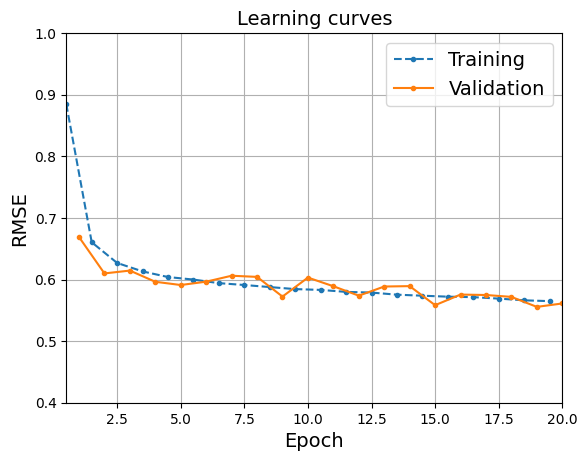

In [68]:
def train2(model, optimizer, criterion, metric, train_loader, valid_loader, n_epochs):
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.
        metric.reset()
        for X_batch, y_batch in train_loader:
            model.train()
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(evaluate_tm(model, valid_loader, metric).item())
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    return history

torch.manual_seed(42)
learning_rate = 0.01
model = nn.Sequential(
    nn.Linear(n_features, 50), nn.ReLU(),
    nn.Linear(50, 40), nn.ReLU(),
    nn.Linear(40, 30), nn.ReLU(),
    nn.Linear(30, 1)
)
model = model.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train2(model, optimizer, mse, rmse, train_loader, valid_loader,
                 n_epochs)

# Since we compute the training metric
plt.plot(np.arange(n_epochs) + 0.5, history["train_metrics"], ".--",
         label="Training")
plt.plot(np.arange(n_epochs) + 1.0, history["valid_metrics"], ".-",
         label="Validation")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.grid()
plt.title("Learning curves")
plt.axis([0.5, 20, 0.4, 1.0])
plt.legend()
plt.show()

Agora que conseguimos calcular métricas corretamente, podemos atualizar a função `train()` para:

- Avaliar o desempenho do modelo **durante o treinamento** no conjunto de treino a cada época;
- Avaliar o desempenho no **conjunto de validação** ao final de cada época.

### Observações importantes:

- Se a performance no conjunto de treino for muito melhor que no conjunto de validação, isso pode indicar:
  - **Overfitting**;
  - Algum **erro nos dados**, como desajuste entre o conjunto de treino e validação.
- É recomendável **plotar as curvas de aprendizado** para analisar essas diferenças, usando:
  - **Matplotlib**;
  - Ou ferramentas de visualização como **TensorBoard**.

---

## Próximos Passos

Até agora, aprendemos a:

- Construir, treinar e avaliar um **MLP de regressão** com PyTorch;
- Utilizar o modelo treinado para fazer previsões.

No entanto, tratamos apenas de **modelos sequenciais simples**, formados por camadas lineares e funções de ativação ReLU.  

Para construir **modelos mais complexos e não sequenciais**, será necessário criar **módulos personalizados**.









# 6. Building Nonsequential Models Using Custom Modules

Alguns modelos de redes neurais precisam receber **várias entradas** que não podem ser facilmente combinadas em um único tensor. Isso ocorre, por exemplo, quando as entradas possuem **diferentes números de dimensões**, como no caso de se alimentar a rede neural com **imagens e textos** ao mesmo tempo.  

Para lidar com essas situações, precisamos **adaptar o método `forward()`** do modelo para aceitar e processar múltiplas entradas separadamente.  

No caso do modelo **Wide & Deep**, que combina diferentes tipos de dados (wide features e deep features), essa adaptação permite que cada entrada seja processada adequadamente antes de serem combinadas na rede.








<div align="center" style="margin-top:20px; margin-bottom:20px;">
  
![wide_deep](Aula_Imagens\wide_deep.png)

</div>

In [69]:
class WideAndDeep(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.deep_stack = nn.Sequential(
            nn.Linear(n_features, 50), nn.ReLU(),
            nn.Linear(50, 40), nn.ReLU(),
            nn.Linear(40, 30), nn.ReLU(),
        )
        self.output_layer = nn.Linear(30 + n_features, 1)

    def forward(self, X):
        deep_output = self.deep_stack(X)
        wide_and_deep = torch.concat([X, deep_output], dim=1)
        return self.output_layer(wide_and_deep)

No PyTorch, podemos incorporar **qualquer módulo** dentro de um módulo personalizado. No modelo **Wide & Deep**, a parte *deep* é uma MLP construída com **`nn.Sequential`**, e a **camada de saída** fica separada porque precisa receber a **concatenação da entrada original `X` com a saída da parte deep**. Como no código a MLP termina em 30 neurônios, a camada final recebe **`30 + n_features`** entradas.

No `forward()` fazemos:

1. Passar `X` pela stack *deep* (MLP) para obter `deep_output`.
2. **Concatenar** `X` e `deep_output` ao longo do eixo de features (`dim=1`).
3. Enviar essa concatenação para a **camada de saída**.

Depois de definir o módulo, seguimos o fluxo usual: **instanciar**, **mover para GPU** (se disponível) e **treinar/avaliar** como qualquer outro modelo. Essa abordagem combina um caminho *wide* (features originais, bom para padrões lineares/co-ocorrências) com um caminho *deep* (interações **não lineares**), mantendo um pipeline simples e flexível para lidar com **entradas múltiplas** e **combinações de módulos**.


In [70]:
torch.manual_seed(42)
model = WideAndDeep(n_features).to(device)
learning_rate = 0.002  # the model changed, so did the optimal learning rate

>`momentum` é um “impulso” no **SGD**: em vez de atualizar só com o gradiente do passo atual, o otimizador mantém uma **velocidade** (v) que acumula gradientes recentes (média exponencial). As regras são ($v \leftarrow \mu v + \nabla_\theta L$) e ($\theta \leftarrow \theta - \text{lr}, v$), onde ($\mu$) é o `momentum` (ex.: 0.9). Isso **suaviza ruído**, acelera na direção consistente e **reduz zigue-zague** em vales alongados. Quando você usa `momentum=0`, vira **SGD puro** (sem memória do passado). Valores típicos: **0.9** ou **0.95**; às vezes **0.99** em problemas muito ruidosos. Se ativar `nesterov=True`, aplica a variante **Nesterov**, que “antecipa” o passo usando a velocidade (pode convergir um pouco melhor).


In [71]:
# extra code: train the model, exactly our previous models
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train2(model, optimizer, mse, rmse, train_loader, valid_loader,
                 n_epochs)

Epoch 1/20, train loss: 1.7802, train metric: 1.3344, valid metric: 0.8690
Epoch 2/20, train loss: 0.6201, train metric: 0.7875, valid metric: 0.9492
Epoch 3/20, train loss: 0.5900, train metric: 0.7682, valid metric: 0.7331
Epoch 4/20, train loss: 0.5607, train metric: 0.7488, valid metric: 0.7771
Epoch 5/20, train loss: 0.5408, train metric: 0.7353, valid metric: 0.7967
Epoch 6/20, train loss: 0.5244, train metric: 0.7241, valid metric: 0.7098
Epoch 7/20, train loss: 0.5070, train metric: 0.7119, valid metric: 0.7419
Epoch 8/20, train loss: 0.4941, train metric: 0.7030, valid metric: 0.6750
Epoch 9/20, train loss: 0.4798, train metric: 0.6928, valid metric: 0.6762
Epoch 10/20, train loss: 0.4657, train metric: 0.6825, valid metric: 0.6678
Epoch 11/20, train loss: 0.4538, train metric: 0.6736, valid metric: 0.6617
Epoch 12/20, train loss: 0.4441, train metric: 0.6665, valid metric: 0.6651
Epoch 13/20, train loss: 0.4328, train metric: 0.6580, valid metric: 0.6803
Epoch 14/20, train lo

Em alguns casos, pode ser necessário enviar **subconjuntos diferentes de features** por caminhos distintos do modelo, como:

- Algumas features passam pelo **caminho wide**.
- Outras features (possivelmente sobrepostas) passam pelo **caminho deep**.

Para isso, uma abordagem comum é **dividir as entradas dentro do método `forward()`**.  

Isso permite controlar exatamente quais features alimentam cada parte da rede, garantindo maior flexibilidade no processamento dos dados.








In [72]:
class WideAndDeepV2(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.deep_stack = nn.Sequential(
            nn.Linear(n_features - 2, 50), nn.ReLU(),
            nn.Linear(50, 40), nn.ReLU(),
            nn.Linear(40, 30), nn.ReLU(),
        )
        self.output_layer = nn.Linear(30 + 5, 1)

    def forward(self, X):
        X_wide = X[:, :5]
        X_deep = X[:, 2:]
        deep_output = self.deep_stack(X_deep)
        wide_and_deep = torch.concat([X_wide, deep_output], dim=1)
        return self.output_layer(wide_and_deep)

`WideAndDeepV2` divide as features em dois ramos: **wide** (5 primeiras colunas) e **deep** (todas as colunas a partir da 3ª). No `__init__`, a MLP (`deep_stack`) recebe `n_features - 2` entradas (bate com `X_deep = X[:, 2:]`, que ignora as duas primeiras colunas) e produz um vetor de tamanho **30**. A camada final (`output_layer`) recebe a **concatenação** de `X_wide` (tamanho **5**) com `deep_output` (tamanho **30**), totalizando **30 + 5** entradas, e gera uma saída escalar.

No `forward`:

1. `X_wide = X[:, :5]` pega as 5 primeiras features (caminho “memorizações lineares”).
2. `X_deep = X[:, 2:]` pega do índice 2 em diante (ou seja, descarta as duas primeiras) para o caminho não linear.
3. `deep_output = self.deep_stack(X_deep)` processa no MLP.
4. `torch.concat([X_wide, deep_output], dim=1)` junta por **colunas** (mesmo batch).
5. `self.output_layer(...)` produz a predição.

Pré-condições e cuidados: **(a)** `n_features ≥ 5` (senão quebra); **(b)** as dimensões precisam bater: `nn.Linear(n_features - 2, 50)` ⇔ `X[:, 2:]`; **(c)** a **ordem/seleção** das colunas tem de ser estável do treino à inferência; **(d)** se mudar o nº de colunas no ramo wide, ajuste o `in_features` da `output_layer`. Para classificação binária, use `BCEWithLogitsLoss` (e `sigmoid` na inferência); para regressão, `MSELoss`/`RMSE`.


Embora seja possível dividir os inputs dentro do método `forward()`, muitas vezes é **mais conveniente que o modelo aceite dois tensores separados** como entrada.  

Vantagens dessa abordagem:

- **Mais claro e organizado**: cada tensor representa explicitamente um subconjunto de features.
- **Evita confusões** ao separar manualmente os dados dentro do forward.
- **Facilita a reutilização** do modelo em diferentes contextos, como combinar imagens e textos ou diferentes tipos de dados estruturados.








In [73]:
torch.manual_seed(42)
model = WideAndDeepV2(n_features).to(device)

In [74]:
# extra code: train the model, exactly our previous models
learning_rate = 0.002
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train2(model, optimizer, mse, rmse, train_loader, valid_loader,
                 n_epochs)

Epoch 1/20, train loss: 1.8482, train metric: 1.3598, valid metric: 0.9100
Epoch 2/20, train loss: 0.6282, train metric: 0.7927, valid metric: 0.8028
Epoch 3/20, train loss: 0.5763, train metric: 0.7591, valid metric: 0.7567
Epoch 4/20, train loss: 0.5413, train metric: 0.7356, valid metric: 0.7290
Epoch 5/20, train loss: 0.5099, train metric: 0.7142, valid metric: 0.7011
Epoch 6/20, train loss: 0.4841, train metric: 0.6958, valid metric: 0.6816
Epoch 7/20, train loss: 0.4656, train metric: 0.6824, valid metric: 0.6670
Epoch 8/20, train loss: 0.4526, train metric: 0.6728, valid metric: 0.6576
Epoch 9/20, train loss: 0.4438, train metric: 0.6662, valid metric: 0.6539
Epoch 10/20, train loss: 0.4380, train metric: 0.6618, valid metric: 0.6498
Epoch 11/20, train loss: 0.4326, train metric: 0.6577, valid metric: 0.6470
Epoch 12/20, train loss: 0.4284, train metric: 0.6546, valid metric: 0.6447
Epoch 13/20, train loss: 0.4253, train metric: 0.6521, valid metric: 0.6452
Epoch 14/20, train lo

## 6.1 Building Models with Multiple Inputs

Alguns modelos de redes neurais precisam receber **mais de uma entrada** que não podem ser facilmente combinadas em um único tensor. Isso acontece, por exemplo, quando as entradas possuem **diferentes números de dimensões**, como ao alimentar a rede com **imagens e textos simultaneamente**.

Para que o modelo **Wide & Deep** aceite **duas entradas separadas** (como ilustrado na Figura abaixo), é necessário **adaptar o método `forward()`** do modelo para processar cada entrada individualmente.

<div align="center" style="margin-top:20px; margin-bottom:20px;">
  
![concat](Aula_Imagens\concat.png)

</div>

In [75]:
class WideAndDeepV3(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.deep_stack = nn.Sequential(
            nn.Linear(n_features - 2, 50), nn.ReLU(),
            nn.Linear(50, 40), nn.ReLU(),
            nn.Linear(40, 30), nn.ReLU(),
        )
        self.output_layer = nn.Linear(30 + 5, 1)

    def forward(self, X_wide, X_deep):
        deep_output = self.deep_stack(X_deep)
        wide_and_deep = torch.concat([X_wide, deep_output], dim=1)
        return self.output_layer(wide_and_deep)

Aqui, o `WideAndDeepV3` passa a **receber duas entradas separadas** no `forward(X_wide, X_deep)`: o ramo *deep* processa `X_deep` com a MLP (`deep_stack`) e o ramo *wide* usa `X_wide` **diretamente**. Depois, concatenamos os dois vetores ao longo do eixo de features (`dim=1`) e mandamos para a `output_layer`. Assim, você pode alimentar o modelo com **tensores distintos** (ex.: campos categóricos one-hot no *wide* e embeddings/numéricos no *deep*), sem forçar tudo para um único tensor. Pré-condições: `X_wide.shape[1]` precisa ser **5** (como definido na `output_layer`) e `X_deep.shape[1]` precisa ser **`n_features - 2`** (como definido na primeira `Linear`). No treino/validação, o seu `DataLoader` deve devolver **triplas** `(X_wide, X_deep, y)` e a chamada vira `y_pred = model(X_wide, X_deep)`; o resto do loop (loss, `backward`, `step`, `zero_grad`) permanece igual. Exemplo mínimo de uso: `pred = model(X[:, :5], X[:, 2:])` (desde que essas fatias respeitem as dimensões esperadas).

Para trabalhar com múltiplas entradas no modelo Wide & Deep, precisamos criar **datasets que retornem separadamente as entradas para o caminho wide e para o caminho deep**.

Isso garante que cada subconjunto de features seja fornecido ao caminho correto da rede, mantendo a consistência e a clareza do fluxo de dados durante o treinamento e a avaliação.








In [76]:
torch.manual_seed(42)
# Divisão da Base de dados (tensores) para Wide
#Train
train_data_wd = TensorDataset(X_train[:, :5], X_train[:, 2:], y_train)
train_loader_wd = DataLoader(train_data_wd, batch_size=32, shuffle=True)
#Valid
valid_data_wd = TensorDataset(X_valid[:, :5], X_valid[:, 2:], y_valid)
valid_loader_wd = DataLoader(valid_data_wd, batch_size=32)
#Test
test_data_wd = TensorDataset(X_test[:, :5], X_test[:, 2:], y_test)
test_loader_wd = DataLoader(test_data_wd, batch_size=32)

Esse trecho cria **datasets e data loaders** para o modelo Wide & Deep com **duas entradas por amostra**. `TensorDataset(X_train[:, :5], X_train[:, 2:], y_train)` empacota três tensores: o **ramo wide** (`X[:, :5]`, primeiras 5 colunas), o **ramo deep** (`X[:, 2:]`, da 3ª coluna em diante) e o **alvo** `y`. O `DataLoader(..., batch_size=32, shuffle=True)` entrega lotes embaralhados de 32 amostras; nos valid/test não embaralhamos. Assim, no loop você recebe **triplas** `(X_wide, X_deep, y)` e chama `model(X_wide, X_deep)`. O `torch.manual_seed(42)` fixa a aleatoriedade (por exemplo, a ordem de embaralhamento). Atenção: as fatias usadas aqui precisam **bater** com as dimensões esperadas pelo modelo (`X_wide` com 5 colunas; `X_deep` com `n_features-2`) e devem ser **consistentes** em train/valid/test.


In [77]:
def evaluate_multi_in(model, data_loader, metric):
    model.eval()
    metric.reset()  # reset the metric at the beginning
    with torch.no_grad():
        for X_batch_wide, X_batch_deep, y_batch in data_loader:
            X_batch_wide = X_batch_wide.to(device)
            X_batch_deep = X_batch_deep.to(device)
            y_batch = y_batch.to(device)
            y_pred = model(X_batch_wide, X_batch_deep)
            metric.update(y_pred, y_batch)  # update it at each iteration
    return metric.compute()  # compute the final result at the end

def train_multi_in(model, optimizer, criterion, metric, train_loader,
                   valid_loader, n_epochs):
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.
        metric.reset()
        for *X_batch_inputs, y_batch in train_loader:
            model.train()
            X_batch_inputs = [X.to(device) for X in X_batch_inputs]
            y_batch = y_batch.to(device)
            y_pred = model(*X_batch_inputs)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_multi_in(model, valid_loader, metric).item())
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    return history

torch.manual_seed(42)
learning_rate = 0.01
model = WideAndDeepV3(n_features).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train_multi_in(model, optimizer, mse, rmse, train_loader_wd,
                         valid_loader_wd, n_epochs)

Epoch 1/20, train loss: 0.8366, train metric: 0.9148, valid metric: 0.6892
Epoch 2/20, train loss: 0.4627, train metric: 0.6803, valid metric: 0.6455
Epoch 3/20, train loss: 0.4319, train metric: 0.6572, valid metric: 0.6374
Epoch 4/20, train loss: 0.4259, train metric: 0.6525, valid metric: 0.6512
Epoch 5/20, train loss: 0.4120, train metric: 0.6420, valid metric: 0.6305
Epoch 6/20, train loss: 0.4040, train metric: 0.6356, valid metric: 0.6287
Epoch 7/20, train loss: 0.4005, train metric: 0.6330, valid metric: 0.6252
Epoch 8/20, train loss: 0.3976, train metric: 0.6306, valid metric: 0.6158
Epoch 9/20, train loss: 0.3883, train metric: 0.6230, valid metric: 0.7407
Epoch 10/20, train loss: 0.3866, train metric: 0.6218, valid metric: 0.6063
Epoch 11/20, train loss: 0.3752, train metric: 0.6125, valid metric: 0.5974
Epoch 12/20, train loss: 0.3704, train metric: 0.6087, valid metric: 0.5887
Epoch 13/20, train loss: 0.3677, train metric: 0.6063, valid metric: 0.5982
Epoch 14/20, train lo

* `model.eval()` — coloca o modelo em **modo avaliação**: desativa comportamentos de treino (ex.: *dropout*) e faz *BatchNorm* usar **estatísticas fixas**.

* `metric.reset()` — **zera o estado interno** da métrica do `torchmetrics` (contadores/somas) para começar uma nova medição limpa.

* `X_batch_inputs = [X.to(device) for X in X_batch_inputs]` — move **todas as entradas do batch** (os dois ramos: `X_wide`, `X_deep`, etc.) para o **mesmo device** do modelo (GPU/CPU), mantendo a ordem; depois elas são passadas como `model(*X_batch_inputs)`.

* `metric.update(y_pred, y_batch)` — **acumula** o resultado desse batch dentro da métrica (sem calcular ainda o valor final). No fim da época, `metric.compute()` usa tudo que foi acumulado para devolver a métrica **global**.

Quando o modelo possui **múltiplas entradas**, é fácil confundir a ordem dos tensores, o que pode gerar **erros difíceis de depurar**.

Para evitar isso, uma boa prática é **nomear cada entrada**.  

Uma abordagem é criar um **dataset personalizado** que retorne um **dicionário**, onde as chaves são os nomes das entradas e os valores são os tensores correspondentes.  

Isso torna o código mais legível e reduz a chance de erros ao alimentar o modelo.








In [78]:
class WideAndDeepDataset(torch.utils.data.Dataset):
    def __init__(self, X_wide, X_deep, y):
        self.X_wide = X_wide
        self.X_deep = X_deep
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        input_dict = {"X_wide": self.X_wide[idx], "X_deep": self.X_deep[idx]}
        return input_dict, self.y[idx]

Após definir como as entradas serão retornadas (separadas ou nomeadas), o próximo passo é **criar os datasets e os data loaders**.

- **Datasets**: fornecem os dados ao modelo de forma estruturada, retornando os tensores correspondentes a cada entrada.
- **Data Loaders**: permitem iterar sobre os datasets em **mini-batches**, embaralhar os dados e facilitar o treinamento eficiente no PyTorch.

Essa etapa garante que o modelo receba os dados corretamente e de forma eficiente durante o treinamento e avaliação.








In [79]:
torch.manual_seed(42)
train_data_named = WideAndDeepDataset(
    X_wide=X_train[:, :5], X_deep=X_train[:, 2:], y=y_train)
train_loader_named = DataLoader(train_data_named, batch_size=32, shuffle=True)
valid_data_named = WideAndDeepDataset(
    X_wide=X_valid[:, :5], X_deep=X_valid[:, 2:], y=y_valid)
valid_loader_named = DataLoader(valid_data_named, batch_size=32)
test_data_named = WideAndDeepDataset(
    X_wide=X_test[:, :5], X_deep=X_test[:, 2:], y=y_test)
test_loader_named = DataLoader(test_data_named, batch_size=32)

In [80]:
def evaluate_named(model, data_loader, metric):
    model.eval()
    metric.reset()  # reset the metric at the beginning
    with torch.no_grad():
        for inputs, y_batch in data_loader:
            inputs = {name: X.to(device) for name, X in inputs.items()}
            y_batch = y_batch.to(device)
            y_pred = model(X_wide=inputs["X_wide"], X_deep=inputs["X_deep"])
            metric.update(y_pred, y_batch)
    return metric.compute()  # compute the final result at the end

def train_named(model, optimizer, criterion, metric, train_loader,
                   valid_loader, n_epochs):
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.
        metric.reset()
        for inputs, y_batch in train_loader:
            model.train()
            inputs = {name: X.to(device) for name, X in inputs.items()}
            y_batch = y_batch.to(device)
            y_pred = model(**inputs)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_named(model, valid_loader, metric).item())
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    return history

torch.manual_seed(42)
learning_rate = 0.01
model = WideAndDeepV3(n_features).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train_named(model, optimizer, mse, rmse, train_loader_named,
                      valid_loader_named, n_epochs)

Epoch 1/20, train loss: 0.8366, train metric: 0.9148, valid metric: 0.6892
Epoch 2/20, train loss: 0.4627, train metric: 0.6803, valid metric: 0.6455
Epoch 3/20, train loss: 0.4319, train metric: 0.6572, valid metric: 0.6374
Epoch 4/20, train loss: 0.4259, train metric: 0.6525, valid metric: 0.6512
Epoch 5/20, train loss: 0.4120, train metric: 0.6420, valid metric: 0.6305
Epoch 6/20, train loss: 0.4040, train metric: 0.6356, valid metric: 0.6287
Epoch 7/20, train loss: 0.4005, train metric: 0.6330, valid metric: 0.6252
Epoch 8/20, train loss: 0.3976, train metric: 0.6306, valid metric: 0.6158
Epoch 9/20, train loss: 0.3883, train metric: 0.6230, valid metric: 0.7407
Epoch 10/20, train loss: 0.3866, train metric: 0.6218, valid metric: 0.6063
Epoch 11/20, train loss: 0.3752, train metric: 0.6125, valid metric: 0.5974
Epoch 12/20, train loss: 0.3704, train metric: 0.6087, valid metric: 0.5887
Epoch 13/20, train loss: 0.3677, train metric: 0.6063, valid metric: 0.5982
Epoch 14/20, train lo

## 6.2 Building Models with Multiple Outputs


Existem diversos cenários em que **uma rede neural precisa ter múltiplas saídas**:

### 1. Tarefas que exigem múltiplos tipos de previsão
- Por exemplo, localizar e classificar o objeto principal em uma imagem.
- Isso combina **regressão** (localização) e **classificação** (tipo do objeto) na mesma rede.

### 2. Multitask Learning (Aprendizado Multitarefa)
- Quando temos **múltimas tarefas independentes** com base nos mesmos dados.
- Treinar uma rede por tarefa é possível, mas **treinar uma única rede com uma saída por tarefa** geralmente gera melhores resultados.
- A rede aprende **features compartilhadas úteis** para todas as tarefas.
- Exemplo: classificar expressões faciais (sorriso, surpresa) e identificar se a pessoa usa óculos simultaneamente.

### 3. Regularização com Saídas Auxiliares
- Adicionar uma saída auxiliar ajuda a **reduzir overfitting** e melhorar a generalização.
- A saída auxiliar força a **parte subjacente da rede** a aprender algo útil por si só.
- Exemplo no modelo **Wide & Deep**:
  - A saída da stack deep tem dimensão 40.
  - O alvo tem dimensão 1.
  - Adicionamos uma camada **`nn.Linear`** para mapear de 40 → 1 para a saída auxiliar.
  - O método `forward()` deve calcular **tanto a saída principal quanto a saída auxiliar**.

<div align="center" style="margin-top:20px; margin-bottom:20px;">
  
![concat](Aula_Imagens\aux_out.png)

</div>

In [81]:
class WideAndDeepV4(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.deep_stack = nn.Sequential(
            nn.Linear(n_features - 2, 50), nn.ReLU(),
            nn.Linear(50, 40), nn.ReLU(),
            nn.Linear(40, 30), nn.ReLU(),
        )
        self.output_layer = nn.Linear(30 + 5, 1)
        self.aux_output_layer = nn.Linear(30, 1)

    def forward(self, X_wide, X_deep):
        deep_output = self.deep_stack(X_deep)
        wide_and_deep = torch.concat([X_wide, deep_output], dim=1)
        main_output = self.output_layer(wide_and_deep)
        aux_output = self.aux_output_layer(deep_output)
        return main_output, aux_output

`WideAndDeepV4` é um **Wide & Deep com saída auxiliar**: o ramo *deep* (MLP) produz um vetor de 30 unidades; dele saem duas cabeças. A **saída principal** (`main_output`) recebe a concatenação do *wide* (5 colunas de entrada direta) com o `deep_output` (30) e passa por `Linear(35→1)`; já a **saída auxiliar** (`aux_output`) conecta **diretamente** o `deep_output` em `Linear(30→1)`. A ideia é fazer **supervisão auxiliar** no ramo profundo para estabilizar e regularizar o treino (o gradiente chega mais “perto” das camadas internas). Na prática, você treina somando perdas, por exemplo: `loss = L_main(main_output, y) + λ * L_aux(aux_output, y)`, com `λ` pequeno (ex.: `0.1`). Em inferência, usa-se só a **saída principal**. Cuidados: `X_wide` deve ter 5 features, `X_deep` deve ter `n_features-2`; as duas saídas têm shape `(batch, 1)` para regressão (ou ajuste a cabeça para classificação conforme o problema).


In [82]:
import torchmetrics

def evaluate_multi_out(model, data_loader, metric):
    model.eval()
    metric.reset()
    with torch.no_grad():
        for inputs, y_batch in data_loader:
            inputs = {name: X.to(device) for name, X in inputs.items()}
            y_batch = y_batch.to(device)
            y_pred, _ = model(**inputs)
            metric.update(y_pred, y_batch)
    return metric.compute()

def train_multi_out(model, optimizer, criterion, metric, train_loader,
                   valid_loader, n_epochs):
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.
        metric.reset()
        for inputs, y_batch in train_loader:
            model.train()
            inputs = {name: X.to(device) for name, X in inputs.items()}
            y_batch = y_batch.to(device)
            y_pred, y_pred_aux = model(**inputs)
            main_loss = criterion(y_pred, y_batch)
            aux_loss = criterion(y_pred_aux, y_batch)
            loss = 0.8 * main_loss + 0.2 * aux_loss
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_multi_out(model, valid_loader, metric).item())
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    return history

torch.manual_seed(42)
learning_rate = 0.01
model = WideAndDeepV4(n_features).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train_multi_out(model, optimizer, mse, rmse, train_loader_named,
                          valid_loader_named, n_epochs)

Epoch 1/20, train loss: 1.0693, train metric: 0.9506, valid metric: 0.7085
Epoch 2/20, train loss: 0.5817, train metric: 0.6946, valid metric: 0.6607
Epoch 3/20, train loss: 0.5010, train metric: 0.6581, valid metric: 0.6425
Epoch 4/20, train loss: 0.4690, train metric: 0.6497, valid metric: 0.6654
Epoch 5/20, train loss: 0.4503, train metric: 0.6420, valid metric: 0.6338
Epoch 6/20, train loss: 0.4387, train metric: 0.6373, valid metric: 0.6563
Epoch 7/20, train loss: 0.4315, train metric: 0.6330, valid metric: 0.6193
Epoch 8/20, train loss: 0.4249, train metric: 0.6302, valid metric: 0.6167
Epoch 9/20, train loss: 0.4116, train metric: 0.6202, valid metric: 0.6450
Epoch 10/20, train loss: 0.4085, train metric: 0.6198, valid metric: 0.5938
Epoch 11/20, train loss: 0.4073, train metric: 0.6196, valid metric: 0.5959
Epoch 12/20, train loss: 0.3914, train metric: 0.6077, valid metric: 0.6074
Epoch 13/20, train loss: 0.3847, train metric: 0.6033, valid metric: 0.5813
Epoch 14/20, train lo

* **Entradas nomeadas (dict) e expansão com `**`**
  Agora o `DataLoader` entrega `inputs` como **dicionário** (ex.: `{"X_wide": ..., "X_deep": ...}`), não mais tupla.
  Por isso usamos:

  ```python
  inputs = {name: X.to(device) for name, X in inputs.items()}
  y_pred, y_pred_aux = model(**inputs)   # chaves do dict devem bater com a assinatura do forward
  ```

  > Diferente de antes, quando fazíamos `model(X_wide, X_deep)` diretamente.

* **Duas saídas (principal + auxiliar)**
  O modelo retorna **duas predições**: `y_pred` (principal) e `y_pred_aux` (auxiliar).
  Na avaliação, só usamos a **principal**:

  ```python
  y_pred, _ = model(**inputs)
  metric.update(y_pred, y_batch)
  ```

* **Perda composta com pesos**
  O treino combina as duas perdas:

  ```python
  main_loss = criterion(y_pred, y_batch)
  aux_loss  = criterion(y_pred_aux, y_batch)
  loss = 0.8 * main_loss + 0.2 * aux_loss
  ```

  > Antes havia uma única perda; aqui há **supervisão auxiliar** ponderada.

* **DataLoaders “named”**
  Usamos `train_loader_named/valid_loader_named`, que **entregam** `(inputs_dict, y)` já com nomes compatíveis com `forward`.

  > Antes os loaders entregavam tuplas (`X_wide, X_deep, y`).


Usar **entradas nomeadas** (dict + `**inputs`) evita bugs de ordem dos tensores, deixa o código mais legível, e facilita escalar o modelo (adicionar/remover ramos como texto/imagem/tabular sem refatorar chamadas). Já a **saída auxiliar** com perda ponderada fornece sinal de gradiente mais curto para o ramo deep, atua como regularização, estabiliza o início do treino e permite monitorar melhor onde está o gargalo (comparando `main_loss` e `aux_loss`). Em suma: nomes trazem **manutenibilidade e segurança**; a cabeça auxiliar traz **estabilidade e generalização**.



# 7. Building an Image Classifier with PyTorch

Neste capítulo, continuaremos trabalhando com o **dataset Fashion MNIST**. A primeira etapa é fazer o download dos dados.

## 7.1 Using TorchVision to Load the Dataset

A **TorchVision** é uma biblioteca essencial no ecossistema PyTorch para **visão computacional**. Ela oferece:

- Funções utilitárias para **baixar datasets comuns**, como MNIST e Fashion MNIST.  
- **Modelos pré-treinados** para diversas tarefas de visão computacional (ver Capítulo 12).  
- Funções para **transformar imagens**, incluindo corte, rotação, redimensionamento, entre outras.  

> Observação: No Google Colab, a TorchVision já vem pré-instalada.

No caso do Fashion MNIST:

- O dataset já vem dividido em:
  - **Treinamento:** 60.000 imagens  
  - **Teste:** 10.000 imagens  
- Para validação, podemos reservar **5.000 imagens** do conjunto de treinamento usando a função `random_split()` do PyTorch.


In [84]:
import torchvision
import torchvision.transforms.v2 as T

toTensor = T.Compose([T.ToImage(), T.ToDtype(torch.float32, scale=True)])

train_and_valid_data = torchvision.datasets.FashionMNIST(
    root="datasets", train=True, download=True, transform=toTensor)
test_data = torchvision.datasets.FashionMNIST(
    root="datasets", train=False, download=True, transform=toTensor)

torch.manual_seed(42)
train_data, valid_data = torch.utils.data.random_split(
    train_and_valid_data, [55_000, 5_000])

100%|██████████| 26.4M/26.4M [00:20<00:00, 1.28MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 116kB/s]
100%|██████████| 4.42M/4.42M [00:05<00:00, 821kB/s] 
100%|██████████| 5.15k/5.15k [00:00<00:00, 19.2MB/s]


Esse código baixa o **FashionMNIST** via TorchVision, **converte as imagens para tensor `float32` em [0,1]** e separa treino/validação de forma reprodutível. O `toTensor` usa `transforms.v2`: `T.ToImage()` garante o formato de imagem e `T.ToDtype(torch.float32, scale=True)` faz o cast para `float32` **escalando** de 0–255 para **0–1**. Em seguida, `FashionMNIST(..., train=True/False, download=True, transform=toTensor)` cria os datasets de **treino (60k)** e **teste (10k)**, salvando em `datasets/`. As imagens são **1×28×28** (tons de cinza) e o transform é aplicado **on the fly** quando você lê cada amostra. Por fim, com `torch.manual_seed(42)` e `random_split(train_and_valid_data, [55_000, 5_000])`, você reserva **5.000** para **validação** e mantém **55.000** para **treino**, com divisão **determinística** por causa da seed. (Se quiser padronizar ainda mais, depois pode adicionar `T.Normalize(mean, std)` ao `Compose`.)

In [85]:
torch.manual_seed(42)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)

Cada entrada é uma tupla (imagem, alvo):

In [86]:
X_sample, y_sample = train_data[0]

Cada imagem tem um formato [canais, linhas, colunas]. Imagens em tons de cinza, como as do Fashion MNIST, possuem um único canal (enquanto imagens RGB possuem 3, e outros tipos de imagens, como imagens de satélite, podem ter muito mais). Imagens de moda são em tons de cinza e têm 28x28 pixels:

In [87]:
X_sample.shape

torch.Size([1, 28, 28])

In [88]:
X_sample.dtype

torch.float32

In [89]:
train_and_valid_data.classes[y_sample]

'Ankle boot'

## 7.2 Building the Classifier

Vamos criar um **módulo personalizado** em PyTorch para uma **MLP (Multi-Layer Perceptron)** com **duas camadas ocultas**.  

Este módulo servirá para classificar as imagens do Fashion MNIST, permitindo:

- Definir facilmente o número de **neurônios em cada camada**.
- Aplicar funções de ativação entre as camadas.
- Facilitar o **treinamento e avaliação** do modelo usando o framework PyTorch.

In [90]:
class ImageClassifier(nn.Module):
    def __init__(self, n_inputs, n_hidden1, n_hidden2, n_classes):
        super().__init__()
        self.mlp = nn.Sequential(
            nn.Flatten(),                   #Embedding
            nn.Linear(n_inputs, n_hidden1),   
            nn.ReLU(),
            nn.Linear(n_hidden1, n_hidden2),
            nn.ReLU(),
            nn.Linear(n_hidden2, n_classes)
        )

    def forward(self, X):
        return self.mlp(X)

torch.manual_seed(42)
model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=300, n_hidden2=100,
                        n_classes=10).to(device)
xentropy = nn.CrossEntropyLoss()

`ImageClassifier` é uma MLP para imagens 1×28×28. A primeira camada é `nn.Flatten()`, que transforma cada imagem de shape `(N, C, H, W)` em `(N, C*H*W)` — aqui vira `(N, 784)`. Em seguida, os dados passam por `Linear→ReLU→Linear→ReLU→Linear`, mapeando `784→300→100→10`. O método `forward(self, X)` apenas define o **caminho de passagem**: ele aplica `self.mlp(X)` e retorna os **logits** (pontuações não normalizadas) de shape `(batch, 10)`. Já `xentropy = nn.CrossEntropyLoss()` é a **perda de classificação multiclasse** que **espera logits** e rótulos inteiros (`torch.long`, valores 0–9); ela combina **LogSoftmax + NLLLoss** internamente, então **não aplique Softmax antes**. No treino, você passa `(logits, targets)` para a perda; na inferência, use `logits.argmax(dim=1)` (ou `softmax(logits, dim=1)` para probabilidades).


>**Logits** são as **pontuações não normalizadas** que o modelo produz antes de virar probabilidade. Para classificação multiclasse, o vetor de logits (um por classe) é convertido em probabilidades pelo **softmax**; para binária (saída de 1 unidade), usa-se o **sigmoid**. Eles podem ser quaisquer números reais (negativos/positivos) e indicam “preferência relativa”: quanto maior o logit de uma classe, maior a probabilidade após a normalização. Em PyTorch, `nn.CrossEntropyLoss` **já espera logits** e aplica `log_softmax` + NLL internamente (por isso **não** aplique softmax antes); de forma análoga, `BCEWithLogitsLoss` espera logits e incorpora o sigmoid com melhorias de **estabilidade numérica**. Em inferência, você pega a classe com `logits.argmax(dim=1)` ou transforma em probabilidades com `softmax(logits, dim=1)`.


In [91]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10).to(device)
_ = train2(model, optimizer, xentropy, accuracy, train_loader, valid_loader,
           n_epochs)

Epoch 1/20, train loss: 0.6060, train metric: 0.7810, valid metric: 0.8426
Epoch 2/20, train loss: 0.4059, train metric: 0.8493, valid metric: 0.8418
Epoch 3/20, train loss: 0.3628, train metric: 0.8665, valid metric: 0.8540
Epoch 4/20, train loss: 0.3350, train metric: 0.8769, valid metric: 0.8624
Epoch 5/20, train loss: 0.3143, train metric: 0.8845, valid metric: 0.8770
Epoch 6/20, train loss: 0.2984, train metric: 0.8872, valid metric: 0.8636
Epoch 7/20, train loss: 0.2847, train metric: 0.8923, valid metric: 0.8734
Epoch 8/20, train loss: 0.2737, train metric: 0.8970, valid metric: 0.8752
Epoch 9/20, train loss: 0.2624, train metric: 0.9015, valid metric: 0.8834
Epoch 10/20, train loss: 0.2525, train metric: 0.9043, valid metric: 0.8704
Epoch 11/20, train loss: 0.2444, train metric: 0.9077, valid metric: 0.8834
Epoch 12/20, train loss: 0.2360, train metric: 0.9099, valid metric: 0.8854
Epoch 13/20, train loss: 0.2280, train metric: 0.9128, valid metric: 0.8882
Epoch 14/20, train lo

Esse trecho configura o treino e o executa. Primeiro, `optimizer = torch.optim.SGD(model.parameters(), lr=0.1)` escolhe o **otimizador SGD** com taxa de aprendizado 0.1 para atualizar os **parâmetros** do `model`. Depois, `accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10).to(device)` cria a **métrica de acurácia** para classificação multiclasse com 10 classes e a move para o mesmo **device** (CPU/GPU) do modelo. Por fim, `train2(model, optimizer, xentropy, accuracy, train_loader, valid_loader, n_epochs)` roda o laço de treino por `n_epochs`, usando a **perda** `xentropy` (CrossEntropyLoss) e medindo **acurácia** em treino/validação; o retorno é atribuído a `_` para indicar que não será usado.

In [92]:
model.eval()
X_new, y_new = next(iter(valid_loader))
X_new = X_new[:3].to(device)
with torch.no_grad():
    y_pred_logits = model(X_new)
y_pred = y_pred_logits.argmax(dim=1)  # index of the largest logit
y_pred

tensor([7, 4, 2])

`model.eval()` coloca o modelo em **modo avaliação** (desativa dropout e usa estatísticas fixas de BatchNorm). `X_new, y_new = next(iter(valid_loader))` pega **um batch** do validador; `X_new = X_new[:3].to(device)` mantém só as **3 primeiras amostras** e move para CPU/GPU. Com `torch.no_grad()` desligamos gradientes (mais rápido, sem ocupar memória) e calculamos `y_pred_logits = model(X_new)`, que são os **logits** (pontuações não normalizadas). Por fim, `y_pred = y_pred_logits.argmax(dim=1)` escolhe, para cada amostra, o **índice da classe com maior logit** (não precisa `softmax` para isso), produzindo os rótulos previstos.


In [93]:
[train_and_valid_data.classes[index] for index in y_pred]

['Sneaker', 'Coat', 'Pullover']

Vamos verificar se o modelo fez as previsões corretas:

In [94]:
y_new[:3]

tensor([7, 4, 2])

Perfeito! 😃

In [95]:
import torch.nn.functional as F

y_proba = F.softmax(y_pred_logits, dim=1)
if device == "mps":
    y_proba = y_proba.cpu()
y_proba.round(decimals=3)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0010, 0.0000, 0.9150, 0.0000,
         0.0840],
        [0.0000, 0.0000, 0.0030, 0.0000, 0.9970, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0010, 0.0000, 0.7710, 0.0000, 0.0720, 0.0000, 0.1550, 0.0000, 0.0000,
         0.0000]])

>Aplica **softmax** para transformar os **logits** em **probabilidades** por classe (cada linha soma 1), movendo para CPU se o device for **MPS** (GPU Apple) e arredondando para 3 casas:
* `F.softmax(y_pred_logits, dim=1)`: converte logits → probabilidades ao longo do eixo das classes (`dim=1`), mantendo shape `(batch, n_classes)`.
* `if device == "mps": y_proba = y_proba.cpu()`: traz o tensor para CPU (útil para exibir/usar com libs que não lidam com MPS).
* `y_proba.round(decimals=3)`: arredonda só para visualização (não use arredondado para cálculos).


In [96]:
y_top4_values, y_top4_indices = torch.topk(y_pred_logits, k=4, dim=1)
y_top4_probas = F.softmax(y_top4_values, dim=1)
if device == "mps":
    y_top4_probas = y_top4_probas.cpu()
y_top4_probas.round(decimals=3)

tensor([[0.9150, 0.0840, 0.0010, 0.0000],
        [0.9970, 0.0030, 0.0000, 0.0000],
        [0.7720, 0.1550, 0.0720, 0.0010]])

>Você está pegando o **Top-4 por amostra** e exibindo as probabilidades dessas 4 classes:

* `torch.topk(y_pred_logits, k=4, dim=1)` retorna **dois tensores**:

  * `y_top4_values`: os **4 maiores logits** por linha (amostra)
  * `y_top4_indices`: os **índices das classes** correspondentes
* `F.softmax(y_top4_values, dim=1)` aplica **softmax só nesses 4 logits**, gerando probabilidades **renormalizadas entre as Top-4** (a massa das demais classes é descartada).

  > Se você fizesse softmax nos **logits completos** e depois selecionasse as Top-4, as probabilidades poderiam ser levemente diferentes; aqui elas são reescaladas para somar 1 **apenas** entre as quatro escolhidas.
* `if device == "mps": y_top4_probas = y_top4_probas.cpu()` move para CPU (útil em Macs com GPU Apple).
* `.round(3)` apenas **arredonda para mostrar** (não use arredondado para cálculos).

Use `y_top4_indices` para mapear para os rótulos de classe (ex.: nomes do Fashion-MNIST).


In [97]:
y_top4_indices

tensor([[7, 9, 5, 8],
        [4, 2, 6, 0],
        [2, 6, 4, 0]])

In [98]:
sum([param.numel() for param in model.parameters()])

266610

>Isso retorna o **número total de parâmetros** do modelo.
* `model.parameters()` — iterador sobre **todos os `nn.Parameter`** do modelo (treináveis por padrão).
* `param.numel()` — quantidade de **elementos** naquele tensor de pesos/viés.
* `sum([...])` — soma tudo → **total de parâmetros** (treináveis + não-treináveis; se quiser só treináveis, filtre).

# 8. Fine-Tuning Neural Network Hyperparameter with Optuna

Além de definir manualmente os **hiperparâmetros** (como visto no Capítulo 9), é possível realizar uma **busca automática** para encontrar valores mais adequados.  

### Abordagens possíveis:
1. **Converter o modelo PyTorch em um estimador Scikit-Learn**:
   - Criando uma classe customizada ou usando uma **wrapper library** como [Skorch](https://skorch.readthedocs.io).  
   - Permite usar métodos como **GridSearchCV** ou **RandomizedSearchCV** para ajustar hiperparâmetros.

2. **Usar bibliotecas dedicadas de fine-tuning** (geralmente mais eficientes):
   - [Optuna](https://optuna.org)  
   - [Ray Tune](https://docs.ray.io)  
   - [Hyperopt](https://hyperopt.github.io/hyperopt)  

Essas bibliotecas oferecem **estratégias poderosas de busca** e são altamente customizáveis.

### Exemplo com Optuna:
1. **Instalação** (no Colab):
   ```python
   %pip install optuna

In [99]:
!pip install optuna

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   -------------------------------

In [100]:
import optuna

def objective(trial):
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    n_hidden = trial.suggest_int("n_hidden", 20, 300)


    model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=n_hidden,
                            n_hidden2=n_hidden, n_classes=10).to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    xentropy = nn.CrossEntropyLoss()
    accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10)
    accuracy = accuracy.to(device)
    
    history = train2(model, optimizer, xentropy, accuracy, train_loader,
                     valid_loader, n_epochs=10)
    validation_accuracy = max(history["valid_metrics"])
    
    return validation_accuracy


### 1. Métodos para sugerir hiperparâmetros:
- **`suggest_float()`**: pede um valor float dentro de um intervalo.  
- **`suggest_int()`**: pede um valor inteiro dentro de um intervalo.  
- **`suggest_categorical()`**: pede um valor dentre opções categóricas.  

Exemplo para **learning_rate**:  
- Intervalo: `10^-5` a `10^-1`  
- Uso de `log=True` para explorar múltiplas escalas (log distribution).  
  - Sem isso, a amostragem uniforme poderia **ignorar valores muito pequenos**, prejudicando a busca.

### 2. Criando e rodando a busca:
1. Criar um **Study** com `optuna.create_study()`.  
   - Definir `direction="maximize"` se a função objetivo retorna uma métrica que deve ser maximizada (por padrão, Optuna minimiza).  
2. Rodar a otimização com `study.optimize()`, passando:
   - A **função objetivo** definida anteriormente.  
   - O **número de trials** (quantas vezes Optuna chama a função objetivo).

### 3. Garantindo reprodutibilidade:
- Definir **random seed do PyTorch**.  
- Definir **random seed do sampler do Optuna**.  

Essa abordagem permite que Optuna explore de forma eficiente diferentes combinações de hiperparâmetros e encontre as melhores configurações para o modelo

In [101]:
torch.manual_seed(42)
sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=5)

[I 2025-11-18 09:04:34,960] A new study created in memory with name: no-name-2b058bee-648c-48a4-8c36-78a0a0289afa


Epoch 1/10, train loss: 2.2769, train metric: 0.1471, valid metric: 0.1860
Epoch 2/10, train loss: 2.2093, train metric: 0.2794, valid metric: 0.3500
Epoch 3/10, train loss: 2.1164, train metric: 0.4109, valid metric: 0.4554
Epoch 4/10, train loss: 1.9776, train metric: 0.5137, valid metric: 0.5560
Epoch 5/10, train loss: 1.7867, train metric: 0.5826, valid metric: 0.6026
Epoch 6/10, train loss: 1.5775, train metric: 0.6184, valid metric: 0.6228
Epoch 7/10, train loss: 1.3978, train metric: 0.6288, valid metric: 0.6326
Epoch 8/10, train loss: 1.2605, train metric: 0.6360, valid metric: 0.6372
Epoch 9/10, train loss: 1.1572, train metric: 0.6467, valid metric: 0.6424


[I 2025-11-18 09:06:30,628] Trial 0 finished with value: 0.6435999870300293 and parameters: {'learning_rate': 0.00031489116479568613, 'n_hidden': 287}. Best is trial 0 with value: 0.6435999870300293.


Epoch 10/10, train loss: 1.0782, train metric: 0.6537, valid metric: 0.6436
Epoch 1/10, train loss: 1.1459, train metric: 0.6229, valid metric: 0.7338
Epoch 2/10, train loss: 0.6108, train metric: 0.7841, valid metric: 0.8000
Epoch 3/10, train loss: 0.5203, train metric: 0.8170, valid metric: 0.8094
Epoch 4/10, train loss: 0.4810, train metric: 0.8302, valid metric: 0.8310
Epoch 5/10, train loss: 0.4558, train metric: 0.8403, valid metric: 0.8352
Epoch 6/10, train loss: 0.4388, train metric: 0.8460, valid metric: 0.8442
Epoch 7/10, train loss: 0.4240, train metric: 0.8512, valid metric: 0.8412
Epoch 8/10, train loss: 0.4123, train metric: 0.8565, valid metric: 0.8510
Epoch 9/10, train loss: 0.3999, train metric: 0.8599, valid metric: 0.8534


[I 2025-11-18 09:09:39,046] Trial 1 finished with value: 0.8539999723434448 and parameters: {'learning_rate': 0.008471801418819975, 'n_hidden': 188}. Best is trial 1 with value: 0.8539999723434448.


Epoch 10/10, train loss: 0.3897, train metric: 0.8637, valid metric: 0.8540
Epoch 1/10, train loss: 2.3069, train metric: 0.1144, valid metric: 0.1082
Epoch 2/10, train loss: 2.2993, train metric: 0.1231, valid metric: 0.1294
Epoch 3/10, train loss: 2.2914, train metric: 0.1606, valid metric: 0.1710
Epoch 4/10, train loss: 2.2836, train metric: 0.1839, valid metric: 0.1840
Epoch 5/10, train loss: 2.2762, train metric: 0.1891, valid metric: 0.1856
Epoch 6/10, train loss: 2.2692, train metric: 0.1910, valid metric: 0.1898
Epoch 7/10, train loss: 2.2623, train metric: 0.1933, valid metric: 0.1932
Epoch 8/10, train loss: 2.2554, train metric: 0.2000, valid metric: 0.2022
Epoch 9/10, train loss: 2.2485, train metric: 0.2122, valid metric: 0.2160


[I 2025-11-18 09:15:49,387] Trial 2 finished with value: 0.23340000212192535 and parameters: {'learning_rate': 4.207988669606632e-05, 'n_hidden': 63}. Best is trial 1 with value: 0.8539999723434448.


Epoch 10/10, train loss: 2.2414, train metric: 0.2299, valid metric: 0.2334
Epoch 1/10, train loss: 2.3035, train metric: 0.1373, valid metric: 0.1526
Epoch 2/10, train loss: 2.3005, train metric: 0.1569, valid metric: 0.1724
Epoch 3/10, train loss: 2.2975, train metric: 0.1755, valid metric: 0.1896
Epoch 4/10, train loss: 2.2945, train metric: 0.1941, valid metric: 0.2132
Epoch 5/10, train loss: 2.2914, train metric: 0.2105, valid metric: 0.2288
Epoch 6/10, train loss: 2.2884, train metric: 0.2261, valid metric: 0.2418
Epoch 7/10, train loss: 2.2853, train metric: 0.2419, valid metric: 0.2580
Epoch 8/10, train loss: 2.2823, train metric: 0.2581, valid metric: 0.2742
Epoch 9/10, train loss: 2.2792, train metric: 0.2736, valid metric: 0.2918


[I 2025-11-18 09:20:02,307] Trial 3 finished with value: 0.30959999561309814 and parameters: {'learning_rate': 1.7073967431528103e-05, 'n_hidden': 263}. Best is trial 1 with value: 0.8539999723434448.


Epoch 10/10, train loss: 2.2761, train metric: 0.2897, valid metric: 0.3096
Epoch 1/10, train loss: 1.8379, train metric: 0.4869, valid metric: 0.6208
Epoch 2/10, train loss: 0.9751, train metric: 0.6666, valid metric: 0.6978
Epoch 3/10, train loss: 0.7608, train metric: 0.7253, valid metric: 0.7416
Epoch 4/10, train loss: 0.6704, train metric: 0.7639, valid metric: 0.7720
Epoch 5/10, train loss: 0.6108, train metric: 0.7913, valid metric: 0.7904
Epoch 6/10, train loss: 0.5686, train metric: 0.8053, valid metric: 0.8052
Epoch 7/10, train loss: 0.5385, train metric: 0.8164, valid metric: 0.8082
Epoch 8/10, train loss: 0.5158, train metric: 0.8243, valid metric: 0.8216
Epoch 9/10, train loss: 0.4988, train metric: 0.8280, valid metric: 0.8220


[I 2025-11-18 09:24:06,692] Trial 4 finished with value: 0.8220000267028809 and parameters: {'learning_rate': 0.002537815508265664, 'n_hidden': 218}. Best is trial 1 with value: 0.8539999723434448.


Epoch 10/10, train loss: 0.4842, train metric: 0.8330, valid metric: 0.8092


>Aumentar a acurácia ou reduzir a Loss?
* Se o **objetivo do produto** é “acertar mais”, prefira **maximizar a métrica de validação** que representa esse objetivo (**acurácia**, **F1**, **AUC**, **QWK** em tarefas ordinais etc.). Você continuará treinando com **loss** (p/ gradiente), mas o **critério de escolha** no Optuna é a **métrica** que importa no fim.

* **Quando escolher minimizar loss?**
  Quando a métrica é **instável** em poucos dados (acurácia pulando muito), quando há **muito desbalanceamento** e você ainda não definiu limiar/ métrica final, ou em **regressão** (use **RMSE/MAE** como loss e como objetivo). A loss é **suave e estável**, costuma correlacionar com generalização.

* **Quando escolher maximizar acurácia (ou outra métrica)?**
  Quando a métrica já está **bem definida e alinhada ao negócio** (ex.: acurácia top-1 em classificação balanceada; **F1** em positivos raros; **AUC-ROC/PR** se você compara curvas; **QWK** em DR ordinal). A seleção por métrica garante que o melhor modelo é o que **de fato performa melhor** do jeito que você será avaliado.

* **Regra prática:**
  Treine **sempre** com uma loss apropriada (p.ex., CrossEntropy com pesos/focal em classe rara). No Optuna, **otimize a métrica de validação** que você reportará. Exceções: dados muito pequenos/ruidosos → minimize loss; regressão → minimize **RMSE/MAE**; ordinais (DR 0–4) → maximize **QWK**; desbalanceado severo → maximize **F1** ou **AUCPR**.

* **Dica final:** mesmo otimizando por métrica, monitore a **loss** (early stopping) e use a métrica como **critério de melhor checkpoint**.


### 1. Algoritmo padrão: TPE
- Optuna utiliza por padrão o **Tree-structured Parzen Estimator (TPE)** para otimização de hiperparâmetros.  
- TPE é um **algoritmo de otimização sequencial baseado em modelo**:
  - Aprende com os **resultados anteriores** para selecionar melhores hiperparâmetros.  
  - Inicialmente começa com valores **aleatórios**.  
  - Progressivamente foca a busca nas **regiões mais promissoras** do espaço de hiperparâmetros.

### 2. Vantagens do TPE:
- Permite encontrar **hiperparâmetros melhores do que a busca aleatória (random search)** no mesmo tempo.  
- Explora eficientemente o espaço de busca, evitando gastar muitas tentativas em regiões pouco promissoras.

### 3. Resultados da otimização:
- Após a execução do estudo (`study.optimize()`), é possível acessar:
  - **Melhores hiperparâmetros encontrados**.  
  - **Acurácia de validação** ou outra métrica associada a esses hiperparâmetros.  

Essa abordagem torna a busca de hiperparâmetros mais inteligente e eficiente, aproveitando os resultados de testes anteriores para melhorar continuamente a escolha dos próximos parâmetros a serem testados.

In [102]:
study.best_params

{'learning_rate': 0.008471801418819975, 'n_hidden': 188}

In [103]:
study.best_value

0.8539999723434448

### 1. Número de trials
- A performance do modelo melhora à medida que aumentamos o número de trials (`n_trials`).  
- Exemplo: aumentar `n_trials` para 50 ou mais geralmente gera resultados melhores, mas leva mais tempo para executar.  
- Alternativa: rodar `optimize()` repetidamente e interromper quando o desempenho for satisfatório.

### 2. Paralelização de trials
- Optuna pode executar trials **em paralelo em múltiplas máquinas**, oferecendo um **aumento quase linear na velocidade**.  
- Passos para paralelização:
  1. Configurar um **banco de dados SQL** (ex.: SQLite ou PostgreSQL).  
  2. Definir o parâmetro `storage` na função `create_study()` apontando para esse banco de dados.  
  3. Definir `study_name` e `load_if_exists=True`.  
  4. Copiar o script de tuning para cada máquina e executar.  
     - Se usar seeds aleatórias, garanta que sejam **diferentes em cada máquina**.  
  5. Todos os scripts trabalham em paralelo, lendo e escrevendo resultados no banco de dados.  
- Benefício adicional: mantém **um log completo de todos os resultados dos experimentos**.

### 3. Boas práticas com a função objetivo
- Em exemplos anteriores, a função `objective()` tinha acesso direto ao conjunto de treino e validação via variáveis globais.  
- Forma mais limpa: **passar os datasets como argumentos adicionais** à função objetivo, garantindo melhor organização e modularidade do código:


In [104]:
def objective(trial, train_loader, valid_loader):
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    n_hidden = trial.suggest_int("n_hidden", 20, 300)


    model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=n_hidden,
                            n_hidden2=n_hidden, n_classes=10).to(device)
    
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    xentropy = nn.CrossEntropyLoss()
    accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10)

    accuracy = accuracy.to(device)

    best_validation_accuracy = 0.0
    for epoch in range(n_epochs):
        history = train2(model, optimizer, xentropy, accuracy, train_loader,
                         valid_loader, n_epochs=1)
        
        validation_accuracy = max(history["valid_metrics"])
        if validation_accuracy > best_validation_accuracy:
            best_validation_accuracy = validation_accuracy
            
        trial.report(validation_accuracy, epoch)
        if trial.should_prune():
            raise optuna.TrialPruned()
    return best_validation_accuracy

**O que essa `objective` faz (bem direto):** em cada *trial* do Optuna, ela amostra **`learning_rate`** (log-uniforme) e **`n_hidden`**, constrói o `ImageClassifier` (duas camadas ocultas iguais), cria **SGD** e **CrossEntropy**, define a **acurácia** do `torchmetrics` e treina por `n_epochs` **dentro** da própria `objective`. A cada época, chama `train2(..., n_epochs=1)`, lê a **acurácia de validação** (`validation_accuracy`), guarda o **melhor valor** em `best_validation_accuracy`, e informa progresso ao Optuna via `trial.report(validation_accuracy, epoch)`. Se o *pruner* decidir podar (`trial.should_prune()`), a *trial* é interrompida com `TrialPruned()`. No fim, retorna a **melhor acurácia de validação** do trial — por isso o seu `study` deve usar `direction="maximize"`.

**Por que funciona:** o Optuna compara o valor retornado (maior = melhor) entre *trials* com diferentes hiperparâmetros e converge para combinações promissoras, podando cedo as ruins.

**Duas notas úteis:**

* Garanta que `train2` **reseta** corretamente a métrica por época (ex.: `metric.reset()`), senão a acurácia pode acumular indevidamente.
* Para reprodutibilidade, fixe **seeds** (PyTorch e Optuna) e considere um *pruner* (ex.: `MedianPruner`) para acelerar.


In [105]:
objective_with_data = lambda trial: objective(
    trial, train_loader=train_loader, valid_loader=valid_loader)

Para definir os argumentos extras (os carregadores de conjuntos de dados, neste caso), basta criar uma função lambda quando necessário e passá-la para o método optimize(). Como alternativa, você pode usar a função functools.partial(), que cria uma função wrapper fina em torno do callable fornecido para fornecer valores padrão para qualquer número de argumentos:

In [106]:
from functools import partial

objective_with_data = partial(objective, train_loader=train_loader,
                              valid_loader=valid_loader)

In [107]:
torch.manual_seed(42)
sampler = optuna.samplers.TPESampler(seed=42)
pruner = optuna.pruners.MedianPruner()
study = optuna.create_study(direction="maximize", sampler=sampler,
                            pruner=pruner)
study.optimize(objective_with_data, n_trials=20)

[I 2025-11-18 09:24:06,794] A new study created in memory with name: no-name-0d50ad86-8859-4f57-af8b-ddd6286c2a29


Epoch 1/1, train loss: 2.2769, train metric: 0.1471, valid metric: 0.1860
Epoch 1/1, train loss: 2.2093, train metric: 0.2794, valid metric: 0.3500
Epoch 1/1, train loss: 2.1164, train metric: 0.4109, valid metric: 0.4554
Epoch 1/1, train loss: 1.9776, train metric: 0.5137, valid metric: 0.5560
Epoch 1/1, train loss: 1.7867, train metric: 0.5826, valid metric: 0.6026
Epoch 1/1, train loss: 1.5775, train metric: 0.6184, valid metric: 0.6228
Epoch 1/1, train loss: 1.3978, train metric: 0.6288, valid metric: 0.6326
Epoch 1/1, train loss: 1.2605, train metric: 0.6360, valid metric: 0.6372
Epoch 1/1, train loss: 1.1572, train metric: 0.6467, valid metric: 0.6424
Epoch 1/1, train loss: 1.0782, train metric: 0.6537, valid metric: 0.6436
Epoch 1/1, train loss: 1.0162, train metric: 0.6611, valid metric: 0.6530
Epoch 1/1, train loss: 0.9665, train metric: 0.6689, valid metric: 0.6622
Epoch 1/1, train loss: 0.9258, train metric: 0.6761, valid metric: 0.6700
Epoch 1/1, train loss: 0.8919, train m

[I 2025-11-18 09:35:58,953] Trial 0 finished with value: 0.7089999914169312 and parameters: {'learning_rate': 0.00031489116479568613, 'n_hidden': 287}. Best is trial 0 with value: 0.7089999914169312.


Epoch 1/1, train loss: 0.7647, train metric: 0.7196, valid metric: 0.7082
Epoch 1/1, train loss: 1.1485, train metric: 0.6157, valid metric: 0.7330
Epoch 1/1, train loss: 0.6133, train metric: 0.7863, valid metric: 0.8082
Epoch 1/1, train loss: 0.5200, train metric: 0.8179, valid metric: 0.8132
Epoch 1/1, train loss: 0.4783, train metric: 0.8312, valid metric: 0.8236
Epoch 1/1, train loss: 0.4533, train metric: 0.8401, valid metric: 0.8026
Epoch 1/1, train loss: 0.4356, train metric: 0.8465, valid metric: 0.8444
Epoch 1/1, train loss: 0.4209, train metric: 0.8511, valid metric: 0.8274
Epoch 1/1, train loss: 0.4082, train metric: 0.8563, valid metric: 0.8398
Epoch 1/1, train loss: 0.3981, train metric: 0.8603, valid metric: 0.8526
Epoch 1/1, train loss: 0.3881, train metric: 0.8640, valid metric: 0.8584
Epoch 1/1, train loss: 0.3782, train metric: 0.8663, valid metric: 0.8544
Epoch 1/1, train loss: 0.3697, train metric: 0.8694, valid metric: 0.8570
Epoch 1/1, train loss: 0.3630, train m

[I 2025-11-18 09:45:16,800] Trial 1 finished with value: 0.8682000041007996 and parameters: {'learning_rate': 0.008471801418819975, 'n_hidden': 188}. Best is trial 1 with value: 0.8682000041007996.


Epoch 1/1, train loss: 0.3192, train metric: 0.8864, valid metric: 0.8632
Epoch 1/1, train loss: 2.2998, train metric: 0.1078, valid metric: 0.1152
Epoch 1/1, train loss: 2.2923, train metric: 0.1305, valid metric: 0.1432
Epoch 1/1, train loss: 2.2856, train metric: 0.1605, valid metric: 0.1704
Epoch 1/1, train loss: 2.2797, train metric: 0.1872, valid metric: 0.1912
Epoch 1/1, train loss: 2.2744, train metric: 0.2091, valid metric: 0.2114
Epoch 1/1, train loss: 2.2693, train metric: 0.2230, valid metric: 0.2216
Epoch 1/1, train loss: 2.2643, train metric: 0.2332, valid metric: 0.2320
Epoch 1/1, train loss: 2.2591, train metric: 0.2408, valid metric: 0.2380
Epoch 1/1, train loss: 2.2538, train metric: 0.2457, valid metric: 0.2424
Epoch 1/1, train loss: 2.2481, train metric: 0.2493, valid metric: 0.2456
Epoch 1/1, train loss: 2.2422, train metric: 0.2511, valid metric: 0.2464
Epoch 1/1, train loss: 2.2360, train metric: 0.2534, valid metric: 0.2476
Epoch 1/1, train loss: 2.2296, train m

[I 2025-11-18 09:52:00,862] Trial 2 finished with value: 0.25380000472068787 and parameters: {'learning_rate': 4.207988669606632e-05, 'n_hidden': 63}. Best is trial 1 with value: 0.8682000041007996.


Epoch 1/1, train loss: 2.1751, train metric: 0.2610, valid metric: 0.2538
Epoch 1/1, train loss: 2.3015, train metric: 0.0997, valid metric: 0.1028
Epoch 1/1, train loss: 2.2984, train metric: 0.1009, valid metric: 0.1050
Epoch 1/1, train loss: 2.2953, train metric: 0.1051, valid metric: 0.1124
Epoch 1/1, train loss: 2.2923, train metric: 0.1160, valid metric: 0.1270
Epoch 1/1, train loss: 2.2894, train metric: 0.1347, valid metric: 0.1496
Epoch 1/1, train loss: 2.2865, train metric: 0.1548, valid metric: 0.1652
Epoch 1/1, train loss: 2.2837, train metric: 0.1699, valid metric: 0.1800
Epoch 1/1, train loss: 2.2808, train metric: 0.1800, valid metric: 0.1872
Epoch 1/1, train loss: 2.2780, train metric: 0.1855, valid metric: 0.1916
Epoch 1/1, train loss: 2.2752, train metric: 0.1893, valid metric: 0.1960
Epoch 1/1, train loss: 2.2725, train metric: 0.1950, valid metric: 0.2008
Epoch 1/1, train loss: 2.2697, train metric: 0.2000, valid metric: 0.2026
Epoch 1/1, train loss: 2.2669, train m

[I 2025-11-18 09:58:26,783] Trial 3 finished with value: 0.23960000276565552 and parameters: {'learning_rate': 1.7073967431528103e-05, 'n_hidden': 263}. Best is trial 1 with value: 0.8682000041007996.


Epoch 1/1, train loss: 2.2469, train metric: 0.2429, valid metric: 0.2396
Epoch 1/1, train loss: 1.8945, train metric: 0.4924, valid metric: 0.6290
Epoch 1/1, train loss: 1.0016, train metric: 0.6583, valid metric: 0.6772
Epoch 1/1, train loss: 0.7747, train metric: 0.7114, valid metric: 0.7248
Epoch 1/1, train loss: 0.6864, train metric: 0.7551, valid metric: 0.7596
Epoch 1/1, train loss: 0.6268, train metric: 0.7833, valid metric: 0.7806
Epoch 1/1, train loss: 0.5830, train metric: 0.7999, valid metric: 0.7862
Epoch 1/1, train loss: 0.5500, train metric: 0.8113, valid metric: 0.8064
Epoch 1/1, train loss: 0.5253, train metric: 0.8184, valid metric: 0.8128
Epoch 1/1, train loss: 0.5061, train metric: 0.8237, valid metric: 0.8202
Epoch 1/1, train loss: 0.4908, train metric: 0.8291, valid metric: 0.8206
Epoch 1/1, train loss: 0.4778, train metric: 0.8337, valid metric: 0.8152
Epoch 1/1, train loss: 0.4681, train metric: 0.8376, valid metric: 0.8304
Epoch 1/1, train loss: 0.4591, train m

[I 2025-11-18 10:04:46,709] Trial 4 finished with value: 0.8428000211715698 and parameters: {'learning_rate': 0.002537815508265664, 'n_hidden': 218}. Best is trial 1 with value: 0.8682000041007996.


Epoch 1/1, train loss: 0.4174, train metric: 0.8555, valid metric: 0.8428


[I 2025-11-18 10:05:06,120] Trial 5 pruned. 


Epoch 1/1, train loss: 2.3017, train metric: 0.1007, valid metric: 0.1056
Epoch 1/1, train loss: 0.8584, train metric: 0.7026, valid metric: 0.7982
Epoch 1/1, train loss: 0.5069, train metric: 0.8211, valid metric: 0.8232
Epoch 1/1, train loss: 0.4498, train metric: 0.8401, valid metric: 0.8354
Epoch 1/1, train loss: 0.4184, train metric: 0.8515, valid metric: 0.8516
Epoch 1/1, train loss: 0.3934, train metric: 0.8579, valid metric: 0.8486
Epoch 1/1, train loss: 0.3755, train metric: 0.8661, valid metric: 0.8532
Epoch 1/1, train loss: 0.3605, train metric: 0.8696, valid metric: 0.8654
Epoch 1/1, train loss: 0.3481, train metric: 0.8739, valid metric: 0.8666
Epoch 1/1, train loss: 0.3361, train metric: 0.8778, valid metric: 0.8712
Epoch 1/1, train loss: 0.3266, train metric: 0.8820, valid metric: 0.8696
Epoch 1/1, train loss: 0.3184, train metric: 0.8843, valid metric: 0.8704
Epoch 1/1, train loss: 0.3097, train metric: 0.8867, valid metric: 0.8798
Epoch 1/1, train loss: 0.3024, train m

[I 2025-11-18 10:11:36,842] Trial 6 finished with value: 0.8867999911308289 and parameters: {'learning_rate': 0.021368329072358756, 'n_hidden': 79}. Best is trial 6 with value: 0.8867999911308289.


Epoch 1/1, train loss: 0.2600, train metric: 0.9045, valid metric: 0.8868


[I 2025-11-18 10:11:55,404] Trial 7 pruned. 


Epoch 1/1, train loss: 2.2926, train metric: 0.1081, valid metric: 0.1064


[I 2025-11-18 10:12:16,031] Trial 8 pruned. 


Epoch 1/1, train loss: 2.2836, train metric: 0.1225, valid metric: 0.1526


[I 2025-11-18 10:12:37,170] Trial 9 pruned. 


Epoch 1/1, train loss: 2.2631, train metric: 0.2483, valid metric: 0.3554
Epoch 1/1, train loss: 0.6987, train metric: 0.7437, valid metric: 0.8334
Epoch 1/1, train loss: 0.4549, train metric: 0.8365, valid metric: 0.8278
Epoch 1/1, train loss: 0.4155, train metric: 0.8482, valid metric: 0.8504
Epoch 1/1, train loss: 0.3915, train metric: 0.8569, valid metric: 0.8400
Epoch 1/1, train loss: 0.3730, train metric: 0.8627, valid metric: 0.8458
Epoch 1/1, train loss: 0.3614, train metric: 0.8673, valid metric: 0.8576
Epoch 1/1, train loss: 0.3489, train metric: 0.8711, valid metric: 0.8520
Epoch 1/1, train loss: 0.3423, train metric: 0.8746, valid metric: 0.8584
Epoch 1/1, train loss: 0.3348, train metric: 0.8766, valid metric: 0.8492
Epoch 1/1, train loss: 0.3294, train metric: 0.8776, valid metric: 0.8642
Epoch 1/1, train loss: 0.3232, train metric: 0.8813, valid metric: 0.8634
Epoch 1/1, train loss: 0.3200, train metric: 0.8823, valid metric: 0.8666
Epoch 1/1, train loss: 0.3142, train m

[I 2025-11-18 10:21:29,198] Trial 10 finished with value: 0.8712000250816345 and parameters: {'learning_rate': 0.08165528450509137, 'n_hidden': 21}. Best is trial 6 with value: 0.8867999911308289.


Epoch 1/1, train loss: 0.2903, train metric: 0.8910, valid metric: 0.8624
Epoch 1/1, train loss: 0.6527, train metric: 0.7611, valid metric: 0.8132
Epoch 1/1, train loss: 0.4503, train metric: 0.8352, valid metric: 0.8466
Epoch 1/1, train loss: 0.4137, train metric: 0.8498, valid metric: 0.8394
Epoch 1/1, train loss: 0.3905, train metric: 0.8579, valid metric: 0.8526
Epoch 1/1, train loss: 0.3757, train metric: 0.8619, valid metric: 0.8458
Epoch 1/1, train loss: 0.3639, train metric: 0.8650, valid metric: 0.8576
Epoch 1/1, train loss: 0.3540, train metric: 0.8692, valid metric: 0.8544
Epoch 1/1, train loss: 0.3479, train metric: 0.8723, valid metric: 0.8622
Epoch 1/1, train loss: 0.3383, train metric: 0.8766, valid metric: 0.8430
Epoch 1/1, train loss: 0.3310, train metric: 0.8788, valid metric: 0.8554
Epoch 1/1, train loss: 0.3270, train metric: 0.8802, valid metric: 0.8578
Epoch 1/1, train loss: 0.3208, train metric: 0.8809, valid metric: 0.8626
Epoch 1/1, train loss: 0.3181, train m

[I 2025-11-18 10:35:32,448] Trial 11 finished with value: 0.864799976348877 and parameters: {'learning_rate': 0.07553503645583182, 'n_hidden': 21}. Best is trial 6 with value: 0.8867999911308289.


Epoch 1/1, train loss: 0.2934, train metric: 0.8900, valid metric: 0.8616
Epoch 1/1, train loss: 0.6195, train metric: 0.7764, valid metric: 0.8170
Epoch 1/1, train loss: 0.4180, train metric: 0.8470, valid metric: 0.8514
Epoch 1/1, train loss: 0.3728, train metric: 0.8639, valid metric: 0.8418
Epoch 1/1, train loss: 0.3476, train metric: 0.8711, valid metric: 0.8662
Epoch 1/1, train loss: 0.3276, train metric: 0.8796, valid metric: 0.8694
Epoch 1/1, train loss: 0.3118, train metric: 0.8847, valid metric: 0.8720
Epoch 1/1, train loss: 0.2984, train metric: 0.8889, valid metric: 0.8734
Epoch 1/1, train loss: 0.2870, train metric: 0.8918, valid metric: 0.8756
Epoch 1/1, train loss: 0.2770, train metric: 0.8968, valid metric: 0.8490
Epoch 1/1, train loss: 0.2694, train metric: 0.8987, valid metric: 0.8780
Epoch 1/1, train loss: 0.2586, train metric: 0.9035, valid metric: 0.8754
Epoch 1/1, train loss: 0.2516, train metric: 0.9064, valid metric: 0.8782
Epoch 1/1, train loss: 0.2430, train m

[I 2025-11-18 10:51:40,569] Trial 12 finished with value: 0.8866000175476074 and parameters: {'learning_rate': 0.08525846269447779, 'n_hidden': 116}. Best is trial 6 with value: 0.8867999911308289.


Epoch 1/1, train loss: 0.2031, train metric: 0.9227, valid metric: 0.8750
Epoch 1/1, train loss: 0.8659, train metric: 0.7036, valid metric: 0.7852
Epoch 1/1, train loss: 0.5123, train metric: 0.8183, valid metric: 0.8178
Epoch 1/1, train loss: 0.4578, train metric: 0.8373, valid metric: 0.8270
Epoch 1/1, train loss: 0.4268, train metric: 0.8485, valid metric: 0.8450
Epoch 1/1, train loss: 0.4040, train metric: 0.8563, valid metric: 0.8486
Epoch 1/1, train loss: 0.3879, train metric: 0.8620, valid metric: 0.8466
Epoch 1/1, train loss: 0.3715, train metric: 0.8668, valid metric: 0.8324
Epoch 1/1, train loss: 0.3584, train metric: 0.8709, valid metric: 0.8570
Epoch 1/1, train loss: 0.3457, train metric: 0.8763, valid metric: 0.8674
Epoch 1/1, train loss: 0.3347, train metric: 0.8788, valid metric: 0.8684
Epoch 1/1, train loss: 0.3259, train metric: 0.8816, valid metric: 0.8664
Epoch 1/1, train loss: 0.3171, train metric: 0.8862, valid metric: 0.8760
Epoch 1/1, train loss: 0.3087, train m

[I 2025-11-18 11:01:08,389] Trial 13 finished with value: 0.8790000081062317 and parameters: {'learning_rate': 0.01891149541864801, 'n_hidden': 116}. Best is trial 6 with value: 0.8867999911308289.


Epoch 1/1, train loss: 0.2670, train metric: 0.9019, valid metric: 0.8784
Epoch 1/1, train loss: 0.9440, train metric: 0.6748, valid metric: 0.7728
Epoch 1/1, train loss: 0.5292, train metric: 0.8132, valid metric: 0.8268
Epoch 1/1, train loss: 0.4689, train metric: 0.8347, valid metric: 0.8306


[I 2025-11-18 11:02:40,287] Trial 14 pruned. 


Epoch 1/1, train loss: 0.4349, train metric: 0.8447, valid metric: 0.8292


[I 2025-11-18 11:03:02,412] Trial 15 pruned. 


Epoch 1/1, train loss: 1.7583, train metric: 0.4682, valid metric: 0.6020
Epoch 1/1, train loss: 0.7498, train metric: 0.7337, valid metric: 0.8142
Epoch 1/1, train loss: 0.4690, train metric: 0.8333, valid metric: 0.8286
Epoch 1/1, train loss: 0.4173, train metric: 0.8513, valid metric: 0.8294
Epoch 1/1, train loss: 0.3842, train metric: 0.8616, valid metric: 0.8580
Epoch 1/1, train loss: 0.3615, train metric: 0.8695, valid metric: 0.8562
Epoch 1/1, train loss: 0.3442, train metric: 0.8756, valid metric: 0.8658
Epoch 1/1, train loss: 0.3292, train metric: 0.8790, valid metric: 0.8742
Epoch 1/1, train loss: 0.3160, train metric: 0.8836, valid metric: 0.8752
Epoch 1/1, train loss: 0.3060, train metric: 0.8876, valid metric: 0.8788
Epoch 1/1, train loss: 0.2967, train metric: 0.8900, valid metric: 0.8830
Epoch 1/1, train loss: 0.2874, train metric: 0.8939, valid metric: 0.8734
Epoch 1/1, train loss: 0.2793, train metric: 0.8978, valid metric: 0.8538
Epoch 1/1, train loss: 0.2717, train m

[I 2025-11-18 11:10:49,555] Trial 16 finished with value: 0.8884000182151794 and parameters: {'learning_rate': 0.03266629913173288, 'n_hidden': 142}. Best is trial 16 with value: 0.8884000182151794.


Epoch 1/1, train loss: 0.2294, train metric: 0.9157, valid metric: 0.8854
Epoch 1/1, train loss: 0.7843, train metric: 0.7313, valid metric: 0.8150


[I 2025-11-18 11:11:45,160] Trial 17 pruned. 


Epoch 1/1, train loss: 0.4771, train metric: 0.8312, valid metric: 0.8170


[I 2025-11-18 11:12:10,628] Trial 18 pruned. 


Epoch 1/1, train loss: 1.7815, train metric: 0.4880, valid metric: 0.6210


[I 2025-11-18 11:12:36,561] Trial 19 pruned. 


Epoch 1/1, train loss: 1.5623, train metric: 0.4917, valid metric: 0.6522


* `partial(objective, train_loader=..., valid_loader=...)` cria uma **versão da função** `objective` já “pré-preenchida” com os *loaders* — assim `study.optimize(...)` pode chamá-la **sem argumentos extras** (só o `trial`).
* `torch.manual_seed(42)` e `TPESampler(seed=42)` fixam **seeds** para reprodutibilidade (mesmas amostragens de hiperparâmetros e mesmos pesos iniciais).
* `MedianPruner()` ativa **poda de trials**: se o desempenho parcial do trial ficar **abaixo da mediana** dos anteriores no mesmo passo (época), o Optuna **interrompe cedo** esse trial, economizando tempo.
* `create_study(direction="maximize", sampler=..., pruner=...)` cria o estudo para **maximizar** a métrica retornada pela `objective` (a sua é acurácia de validação).
* `study.optimize(objective_with_data, n_trials=20)` roda **20 trials**, cada um testando combinações diferentes (via **TPE**), com poda automática pelo pruner.

In [108]:
study.best_value

0.8884000182151794

In [109]:
study.best_params

{'learning_rate': 0.03266629913173288, 'n_hidden': 142}

# 9. Saving and Loading a PyTorch Model

- **Método mais simples:**  
  Utilizar `torch.save()` passando o **modelo** e o **caminho do arquivo**.

- **Como funciona:**  
  1. O objeto do modelo é **serializado** usando o módulo `pickle` do Python, que converte objetos em uma sequência de bytes.  
  2. Em seguida, o resultado é **compactado (zip)** e salvo no disco.

- **Convenção de arquivos:**  
  - Extensões comuns: `.pt` ou `.pth`.

In [110]:
torch.save(model, "my_fashion_mnist.pt")

Definir weights_only=False garante que todo o objeto do modelo seja carregado, e não apenas os parâmetros do modelo. Assim, você pode usar o modelo carregado para inferência. Não se esqueça de alternar para o modo de avaliação primeiro usando o método eval():

In [111]:
loaded_model = torch.load("my_fashion_mnist.pt", weights_only=False)

In [112]:
loaded_model.eval()
y_pred_logits = loaded_model(X_new)

Embora salvar o modelo completo com `torch.save()` seja fácil e prático, essa abordagem apresenta **problemas sérios**:

1. **Segurança:**  
   - O formato de serialização do `pickle` é **notoriamente inseguro**.  
   - Embora `torch.save()` não salve código personalizado diretamente, o formato pickle suporta isso.  
   - Um modelo malicioso pode conter **código que será executado automaticamente** ao carregar o modelo.  
   - **Regra importante:** só carregue modelos de fontes confiáveis.

2. **Fragilidade e compatibilidade:**  
   - Pickle pode ser **suscetível a mudanças entre versões do Python** (ex.: grandes mudanças entre Python 3.7 e 3.8).  
   - Ele salva caminhos de arquivos específicos do código, o que pode **quebrar o carregamento** se a estrutura de pastas for diferente.

### Recomendação:
Para evitar esses problemas, é **melhor salvar e carregar apenas os pesos do modelo**, em vez de salvar o objeto completo. Isso mantém a segurança e aumenta a compatibilidade entre diferentes ambientes e versões do Python.

In [113]:
torch.save(model.state_dict(), "my_fashion_mnist_weights.pt")

In [114]:
type(model.state_dict())

collections.OrderedDict

Para aumentar a segurança e compatibilidade ao salvar modelos PyTorch, é recomendado salvar **apenas os pesos** do modelo, usando o **state dictionary**.

### O que é `state_dict()`:
- Retorna um **OrderedDict do Python** contendo:
  - Cada **parâmetro do modelo** (retornado por `named_parameters()`).
  - **Buffers**, se houver, que são tensores registrados via `register_buffer()`.  
    - Buffers armazenam dados adicionais necessários ao modelo, mas **não são parâmetros treináveis** (ex.: estatísticas de batch-norm).

### Como carregar apenas os pesos:
1. Crie um modelo com a **mesma estrutura** do modelo original.  
2. Carregue os pesos usando `torch.load()` com `weights_only=True`.  
3. Aplique os pesos ao modelo com `load_state_dict()`.  
4. Coloque o modelo em **modo de avaliação** antes da inferência.

```python
# Criação do modelo com a mesma arquitetura
model = MyModel()

# Carrega apenas os pesos
weights = torch.load("meus_pesos.pth", weights_only=True)

# Aplica os pesos ao modelo
model.load_state_dict(weights)

# Coloca o modelo em modo de avaliação
model.eval()

In [115]:
new_model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=300, n_hidden2=100,
                            n_classes=10)
loaded_weights = torch.load("my_fashion_mnist_weights.pt", weights_only=True)
new_model.load_state_dict(loaded_weights)
new_model.eval()

ImageClassifier(
  (mlp): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=300, bias=True)
    (2): ReLU()
    (3): Linear(in_features=300, out_features=100, bias=True)
    (4): ReLU()
    (5): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [116]:
model_data = {
    "model_state_dict": model.state_dict(),
    "model_hyperparameters": {
        "n_inputs": 1 * 28 * 28,
        "n_hidden1": 300,
        "n_hidden2": 100,
        "n_classes": 10,
    }
}
torch.save(model_data, "my_fashion_mnist_model.pt")

In [117]:
loaded_data = torch.load("my_fashion_mnist_model.pt", weights_only=True)
new_model = ImageClassifier(**loaded_data["model_hyperparameters"])
new_model.load_state_dict(loaded_data["model_state_dict"])
new_model.eval()

ImageClassifier(
  (mlp): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=300, bias=True)
    (2): ReLU()
    (3): Linear(in_features=300, out_features=100, bias=True)
    (4): ReLU()
    (5): Linear(in_features=100, out_features=10, bias=True)
  )
)

# 10. Compiling and Optimizing a PyTorch Model

O PyTorch possui um recurso poderoso chamado **TorchScript**, que permite transformar o código do modelo em uma versão **estaticamente tipada** do Python.  

#### Benefícios principais:

1. **Otimização e desempenho**  
   - TorchScript pode ser **compilado e otimizado**, tornando o modelo mais rápido.  
   - Exemplos de otimizações:
     - **Fusão de operações**: várias operações podem ser combinadas em uma única operação mais eficiente.  
     - **Constant folding**: operações com constantes (ex.: `2 * 3`) são substituídas pelo resultado (`6`).  
     - Código não utilizado pode ser removido (pruning).

2. **Portabilidade e serialização**  
   - Modelos podem ser **salvos em disco** e carregados tanto em **Python** quanto em **C++** usando a biblioteca **LibTorch**.  
   - Possibilita a execução em **diversos dispositivos**, incluindo embarcados.

#### Formas de conversão:

- **Tracing**: O PyTorch executa o modelo com **dados de exemplo**, registra todas as operações e converte esse registro em TorchScript.  
  - Implementação: usando a função `torch.jit.trace()`.








In [118]:
torchscript_model = torch.jit.trace(model, X_new)

oi


O **tracing** funciona bem para modelos **estáticos**, cujo método `forward()` não utiliza **condicionais** ou **loops**.  

- Problemas do tracing em modelos dinâmicos:
  - Se o modelo contém **`if` ou `match`**, apenas a **ramificação executada** será capturada.  
  - Se o modelo contém **loops**, o TorchScript registrará **uma cópia das operações para cada iteração executada**, o que geralmente não é desejado.

#### Alternativa: **Scripting**
- O PyTorch **analisa diretamente o código Python** e converte em TorchScript.  
- Suporta:
  - **`if`** e **`while`** (condições baseadas em tensores).  
  - **`for`** ao iterar sobre tensores.

- Limitações:
  - Apenas um **subconjunto de Python** é suportado:
    - Não pode usar **variáveis globais**, **generators (`yield`)**, **list comprehensions complexas**, **argumentos de função variáveis (`*args` ou `**kwargs`)**, ou **`match`**.  
    - Tipos devem ser **fixos** (uma função não pode retornar inteiro em alguns casos e float em outros).  
    - Chamadas a funções externas só funcionam se também respeitarem essas regras (sem bibliotecas padrão ou de terceiros).  

> Apesar das restrições, para a maioria dos modelos reais, é relativamente fácil seguir essas regras.  
> Modelos podem ser **salvos e reutilizados** usando scripting.








In [119]:
torchscript_model = torch.jit.script(model)

Independentemente de você ter usado **tracing** ou **scripting** para criar o modelo TorchScript, é possível realizar **otimizações adicionais** para melhorar desempenho e eficiência.

Essas otimizações podem incluir:

- **Fusão de operações** adicionais.  
- **Remoção de código não utilizado** (pruning).  
- **Constant folding** mais avançado.  

> Essas melhorias ajudam a acelerar a execução do modelo e a reduzir o consumo de recursos.








In [120]:
optimized_model = torch.jit.optimize_for_inference(torchscript_model)

- **Finalidade:**  
  Modelos convertidos para **TorchScript** são destinados **apenas para inferência** (predições).  

- **Limitações:**  
  - Não suportam **rastreio de gradiente** (`gradient tracking`).  
  - Não permitem **atualização de parâmetros** durante treinamento.  

- **Salvamento de modelos:**  
  Um modelo TorchScript pode ser salvo usando o método `save()`:

In [121]:
optimized_model.save("my_fashion_mnist_torchscript.pt")

E então carregue-o usando a função torch.jit.load():

In [122]:
loaded_torchscript_model = torch.jit.load("my_fashion_mnist_torchscript.pt")

In [123]:
y_pred_logits = loaded_torchscript_model(X_new)
y_pred_logits

tensor([[ -3.5579,  -0.6257,  -3.8845,  -2.6245,  -3.3111,   2.5662,  -3.4226,
           9.2912,  -0.1451,   6.9049],
        [ -0.1743,  -1.5920,  10.4675,  -1.6848,  16.2073, -12.6346,   7.4614,
         -10.5086,  -0.8643,  -7.8964],
        [  0.7588,  -2.5662,   7.3250,  -1.2094,   4.9593,  -5.6175,   5.7191,
          -3.9459,  -0.6780,  -4.6496]])


- **TorchScript** não está mais em desenvolvimento ativo:
  - Correções de bugs ainda ocorrem, mas **nenhuma nova funcionalidade** é adicionada.
- Continua sendo útil para **executar modelos PyTorch em C++**.  

- Com o **PyTorch 2.0 (março de 2023)**, o foco mudou para **novas ferramentas de compilação** baseadas na função `torch.compile()`, que são:
  - Fáceis de usar  
  - Mais eficientes  
  - Melhor adaptadas para modelos dinâmicos e otimizações automáticas

In [124]:
compiled_model = torch.compile(model)

ImportError: cannot import name 'cache_on_self_and_args' from 'torch._inductor.utils' (c:\Users\estev\OneDrive\Área de Trabalho\NCIA\.ncia\Lib\site-packages\torch\_inductor\utils.py)

In [ ]:
if device == "cuda":
    y_pred_logits = compiled_model(X_new)

W1007 08:38:10.662000 360 torch/_inductor/utils.py:1436] [0/0] Not enough SMs to use max_autotune_gemm mode


Após criar um modelo TorchScript, ele pode ser usado **normalmente para inferência** e será **compilado e otimizado automaticamente**.  

- Isso é conhecido como **Just-In-Time (JIT) compilation**, em contraste com **Ahead-Of-Time (AOT)**.  
- No PyTorch 2.x, `torch.compile()` utiliza internamente:
  - **TorchDynamo**: captura o grafo de computação do modelo a partir do bytecode Python, permitindo lidar corretamente com **condicionais** e **loops**.  
  - **TorchInductor**: realiza a compilação e otimização real, gerando código altamente eficiente:
    - GPU Nvidia: usando a linguagem **Triton**  
    - CPU: usando **OpenMP**  
  - Outros backends: por exemplo, **XLA** para TPUs (configurável com `device="xla"`).

> Com essas ferramentas, você pode construir e treinar **redes neurais complexas e eficientes**.

---

### Próximos Passos no Aprendizado com PyTorch

Nos próximos capítulos, você aprenderá a trabalhar com:

- **Redes muito profundas**  
- **Arquiteturas populares**:
  - CNNs para imagens  
  - RNNs para dados sequenciais  
  - Transformers para texto  
  - Autoencoders para representação  
  - GANs e modelos de difusão para geração de dados
- **Reinforcement learning** para agentes autônomos  
- **Deploy e otimização de modelos PyTorch**

![NCIA2](NCIA_Images\end.png)